In [8]:
#basic
import numpy as np
import pandas as pd
import os

#plot
import seaborn as sns
import matplotlib.pyplot as plt

#model training
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

#optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Integer

#regressors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 1.Import Dataset

In [9]:
user = os.getlogin()
print(user)

root


In [10]:
if user == 'Yushu gong':
    df = pd.read_csv("C:\\Users\\Yushu gong\\Desktop\\Albert School\\ML-SL\\Final-Project\\company_esg_financial_dataset.csv")
else:
    df = pd.read_csv(r"/Users/vivianhung/Documents/git_project/Machine-Learning-Project/data/company_esg_financial_dataset.csv")

In [11]:
df.head(10)

CompanyID CompanyName Industry         Region  Year  Revenue  ProfitMargin  \
0          1   Company_1   Retail  Latin America  2015    459.2           6.0   
1          1   Company_1   Retail  Latin America  2016    473.8           4.6   
2          1   Company_1   Retail  Latin America  2017    564.9           5.2   
3          1   Company_1   Retail  Latin America  2018    558.4           4.3   
4          1   Company_1   Retail  Latin America  2019    554.5           4.9   
5          1   Company_1   Retail  Latin America  2020    567.5           6.0   
6          1   Company_1   Retail  Latin America  2021    604.2           5.2   
7          1   Company_1   Retail  Latin America  2022    593.2           4.2   
8          1   Company_1   Retail  Latin America  2023    636.7           5.3   
9          1   Company_1   Retail  Latin America  2024    687.0           4.6   

   MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  \
0      337.5         NaN         57.0               60.7        33.5   
1      366.6         3.2         56.7               58.9        32.8   
2      313.4        19.2         56.5               57.6        34.0   
3      283.0        -1.1         58.0               62.3        33.4   
4      538.1        -0.7         56.6               63.7        30.0   
5      384.1         2.3         55.7               65.1        28.5   
6      479.3         6.5         55.6               66.8        25.5   
7      248.4        -1.8         57.7               69.0        27.1   
8      373.9         7.3         57.8               68.3        27.0   
9      460.1         7.9         58.5               68.9        29.9   

   ESG_Governance  CarbonEmissions  WaterUsage  EnergyConsumption  
0            76.8          35577.4     17788.7            71154.7  
1            78.5          37314.7     18657.4            74629.4  
2            77.8          45006.4     22503.2            90012.9  
3            78.3          42650.1     21325.1            85300.2  
4            76.1          41799.4     20899.7            83598.8  
5            73.5          42245.4     21122.7            84490.9  
6            74.6          44263.8     22131.9            88527.7  
7            76.9          42536.3     21268.2            85072.6  
8            78.1          45956.3     22978.2            91912.6  
9            76.8          49289.1     24644.5            98578.1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [13]:
print(df['Year'].nunique())
print(df['CompanyID'].nunique())

11
1000


In [14]:
df.describe()

CompanyID          Year        Revenue  ProfitMargin      MarketCap  \
count  11000.000000  11000.000000   11000.000000  11000.000000   11000.000000   
mean     500.500000   2020.000000    4670.850591     10.900455   13380.622236   
std      288.688113      3.162421    9969.954369      8.758711   39922.870373   
min        1.000000   2015.000000      35.900000    -20.000000       1.800000   
25%      250.750000   2017.000000     938.775000      5.300000    1098.525000   
50%      500.500000   2020.000000    1902.300000     10.500000    3096.450000   
75%      750.250000   2023.000000    4342.625000     16.300000    9995.500000   
max     1000.000000   2025.000000  180810.400000     50.000000  865271.700000   

         GrowthRate   ESG_Overall  ESG_Environmental    ESG_Social  \
count  10000.000000  11000.000000       11000.000000  11000.000000   
mean       4.830370     54.615273          56.416991     55.660582   
std        9.424787     15.893937          26.767233     23.356152   
min      -36.000000      6.300000           0.000000      0.000000   
25%       -1.325000     44.100000          34.700000     37.600000   
50%        4.900000     54.600000          55.600000     55.150000   
75%       11.000000     65.600000          79.000000     73.800000   
max       38.000000     98.800000         100.000000    100.000000   

       ESG_Governance  CarbonEmissions    WaterUsage  EnergyConsumption  
count    11000.000000     1.100000e+04  1.100000e+04       1.100000e+04  
mean        51.767655     1.271462e+06  5.600442e+05       1.165839e+07  
std         25.323370     5.067760e+06  1.565686e+06       5.095836e+07  
min          0.000000     2.042200e+03  1.021100e+03       5.105500e+03  
25%         30.775000     1.228530e+05  6.488467e+04       3.069161e+05  
50%         52.100000     2.920734e+05  2.038805e+05       1.221745e+06  
75%         73.000000     7.407311e+05  5.251880e+05       5.616437e+06  
max        100.000000     1.741047e+08  5.223142e+07       1.741047e+09

In [15]:
df.columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')

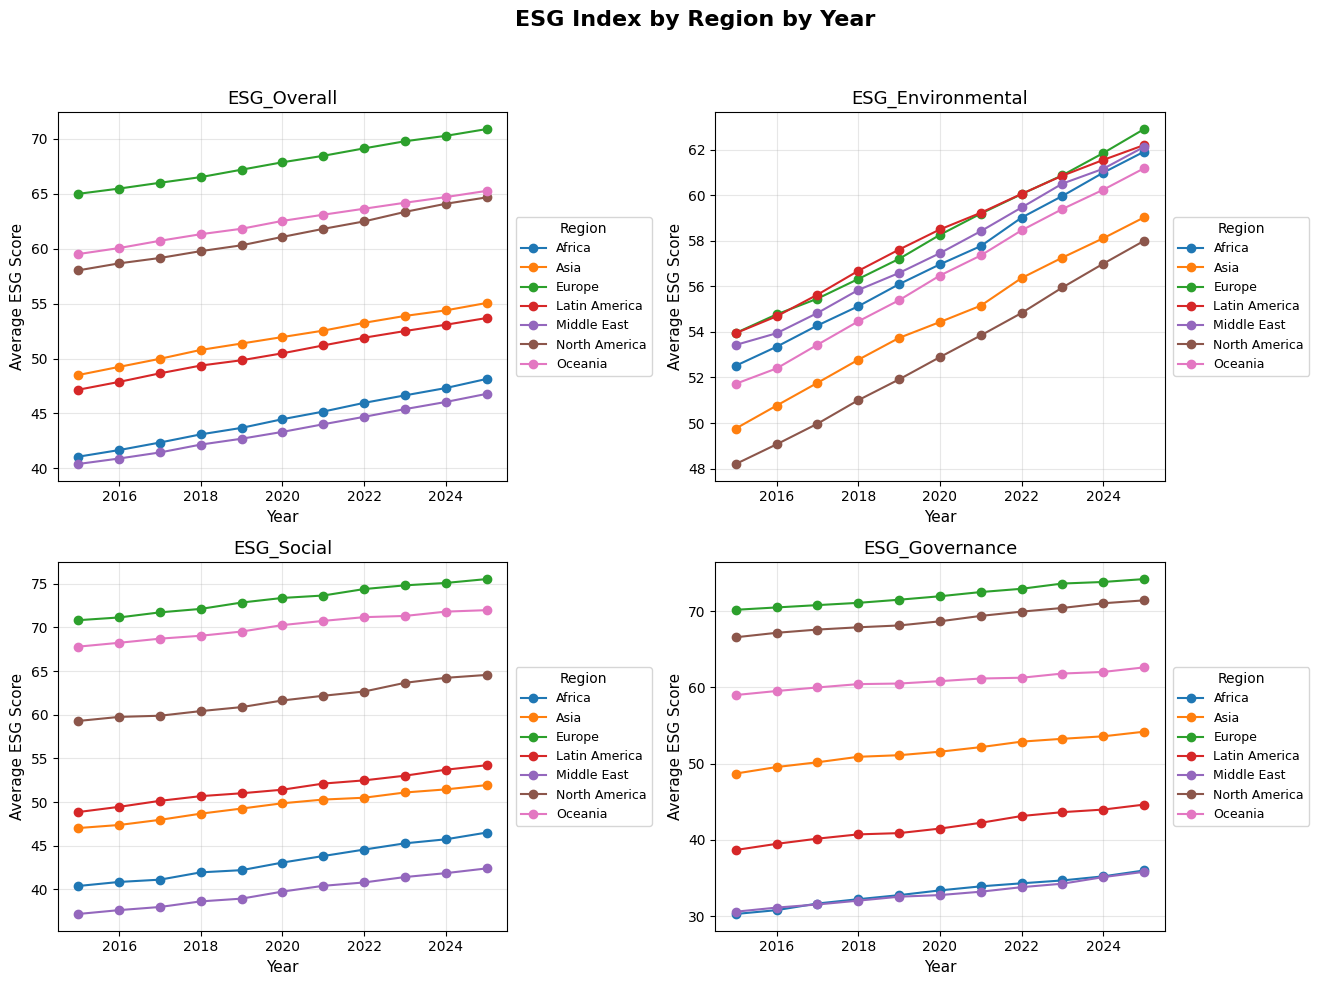

In [16]:
# ESG columns to plot
esg_columns = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(esg_columns):
    ax = axes[i]
    df_avg = df.groupby(['Year', 'Region'])[col].mean().reset_index()

    # Plot each industry's trend
    for industry in df_avg['Region'].unique():
        data = df_avg[df_avg['Region'] == industry]
        ax.plot(data['Year'], data[col], marker='o', label=industry)

    # Titles and labels
    ax.set_title(f'{col}', fontsize=13)
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel('Average ESG Score', fontsize=11)
    ax.grid(True, alpha=0.3)

    # Legend outside each subplot on the right
    ax.legend(
        title='Region',
        bbox_to_anchor=(1.02, 0.5),
        loc='center left',
        borderaxespad=0.,
        fontsize=9,
        title_fontsize=10
    )

# Add a single main title for the entire figure
fig.suptitle('ESG Index by Region by Year', fontsize=16, fontweight='bold')

# Adjust layout to leave space for the main title and legends
plt.tight_layout(rect=[0, 0, 0.95, 0.95])

plt.show()

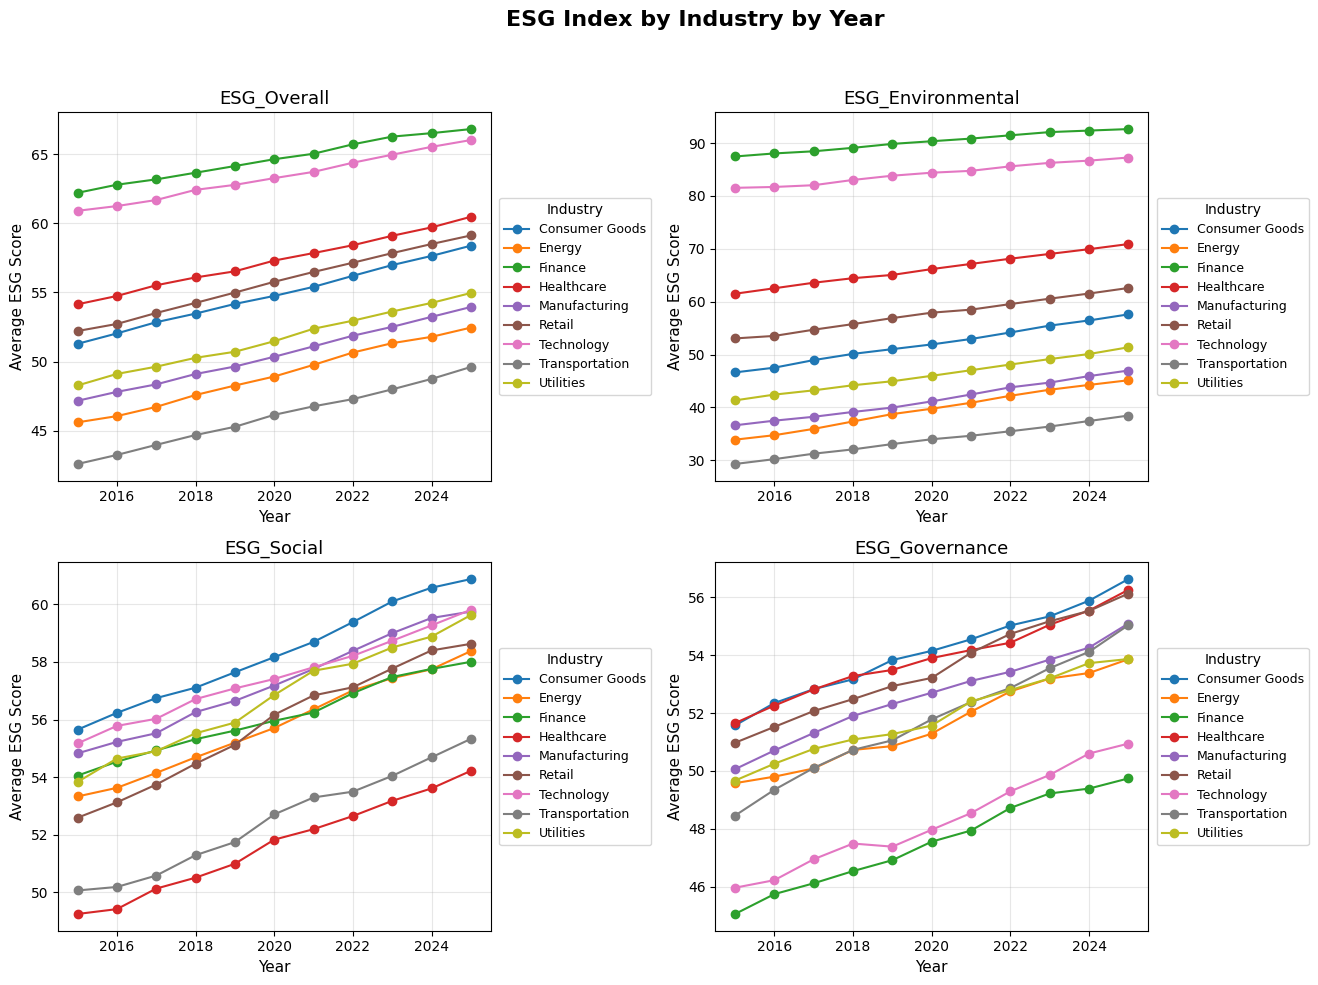

In [17]:
# ESG columns to plot
esg_columns = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(esg_columns):
    ax = axes[i]
    df_avg = df.groupby(['Year', 'Industry'])[col].mean().reset_index()

    # Plot each industry's trend
    for industry in df_avg['Industry'].unique():
        data = df_avg[df_avg['Industry'] == industry]
        ax.plot(data['Year'], data[col], marker='o', label=industry)

    # Titles and labels
    ax.set_title(f'{col}', fontsize=13)
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel('Average ESG Score', fontsize=11)
    ax.grid(True, alpha=0.3)

    # Legend outside each subplot on the right
    ax.legend(
        title='Industry',
        bbox_to_anchor=(1.02, 0.5),
        loc='center left',
        borderaxespad=0.,
        fontsize=9,
        title_fontsize=10
    )

# Add a single main title for the entire figure
fig.suptitle('ESG Index by Industry by Year', fontsize=16, fontweight='bold')

# Adjust layout to leave space for the main title and legends
plt.tight_layout(rect=[0, 0, 0.95, 0.95])

plt.show()

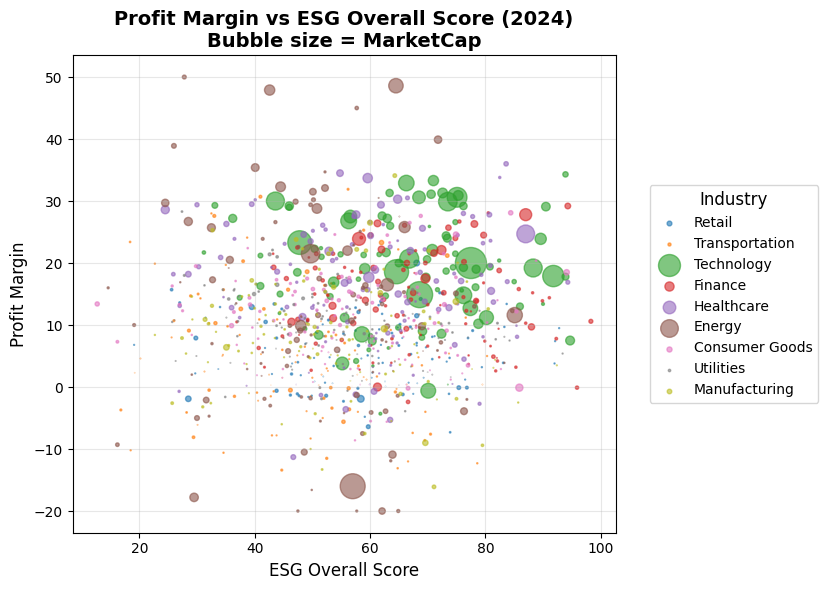

In [18]:
# Filter data for 2024
df_2024 = df[df['Year'] == 2024]

# Normalize bubble size for better visualization
size_scale = 500  # Adjust this to change bubble sizes
sizes = df_2024['MarketCap'] / df_2024['MarketCap'].max() * size_scale

# Create bubble chart
plt.figure(figsize=(10, 6))
for industry in df_2024['Industry'].unique():
    data = df_2024[df_2024['Industry'] == industry]
    plt.scatter(
        data['ESG_Overall'],
        data['ProfitMargin'],
        s=data['MarketCap'] / df_2024['MarketCap'].max() * size_scale,  # bubble size
        alpha=0.6,
        label=industry
    )

# Labels and title
plt.xlabel('ESG Overall Score', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin vs ESG Overall Score (2024)\nBubble size = MarketCap', fontsize=14, fontweight='bold')

# Legend outside on the right
plt.legend(
    title='Industry',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    fontsize=10,
    title_fontsize=12
)

plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [19]:
# ============================================
# 🧾 Construct 2023–2024 Comparison and YoY Table
# ============================================

# 🧩 Sort by company and year to ensure proper ordering
df_2023_2024 = df.sort_values(by=['CompanyID', 'Year'])

# 🧩 Columns to compute YoY difference
cols_to_diff = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

# 🧮 Compute YoY (current year - previous year) for each company
for col in cols_to_diff:
    df_2023_2024[f'{col}_YoY'] = df_2023_2024.groupby('CompanyID')[col].diff()

# 🧹 Keep only the latest year (2024) — since YoY is defined relative to 2023
df_final = df_2023_2024[df_2023_2024['Year'] == 2024].copy()

# 🗑️ Drop any unneeded intermediate columns (previous year references if they exist)
df_final = df_final.reset_index(drop=True)

# ✅ Quick check
print("✅ df_final created successfully.")
print("Shape:", df_final.shape)
print("Columns:", df_final.columns.tolist())

# 🔍 Preview first few rows
df_final.head()

✅ df_final created successfully.
Shape: (1000, 27)
Columns: ['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption', 'Revenue_YoY', 'ProfitMargin_YoY', 'MarketCap_YoY', 'GrowthRate_YoY', 'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY', 'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY']


CompanyID CompanyName        Industry         Region  Year  Revenue  \
0          1   Company_1          Retail  Latin America  2024    687.0   
1          2   Company_2          Retail           Asia  2024   3822.9   
2          3   Company_3  Transportation  Latin America  2024    438.0   
3          4   Company_4      Technology         Africa  2024   6555.1   
4          5   Company_5         Finance    Middle East  2024   3282.1   

   ProfitMargin  MarketCap  GrowthRate  ESG_Overall  ...  ProfitMargin_YoY  \
0           4.6      460.1         7.9         58.5  ...              -0.7   
1          -1.2     5807.8         3.6         65.7  ...              -0.5   
2          10.3      739.4         5.5         32.1  ...               2.2   
3          26.0    45451.6        12.2         63.5  ...              -0.5   
4          22.5     9663.0         0.0         47.4  ...               0.6   

   MarketCap_YoY  GrowthRate_YoY  ESG_Overall_YoY  ESG_Environmental_YoY  \
0           86.2             0.6              0.7                    0.6   
1         3284.6           -15.2             -0.3                   -1.2   
2          240.7            -1.1             -0.2                    3.2   
3        10670.0             9.9              0.9                    0.0   
4         3221.2            -6.1              1.5                    3.9   

   ESG_Social_YoY  ESG_Governance_YoY  CarbonEmissions_YoY  WaterUsage_YoY  \
0             2.9                -1.3               3332.8          1666.3   
1             1.4                -1.3              12644.9          6322.4   
2            -2.3                -1.4               8729.7          1454.9   
3             0.7                 1.8              17773.5         10664.1   
4            -0.1                 0.5              -1809.4          -904.7   

   EnergyConsumption_YoY  
0                 6665.5  
1                25289.7  
2                29099.1  
3                35547.1  
4                -4523.7  

[5 rows x 27 columns]

/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/274835300.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{10**t:,.0f}" if t > 0 else "" for t in ticks])
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/274835300.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/274835300.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/274835300.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usin

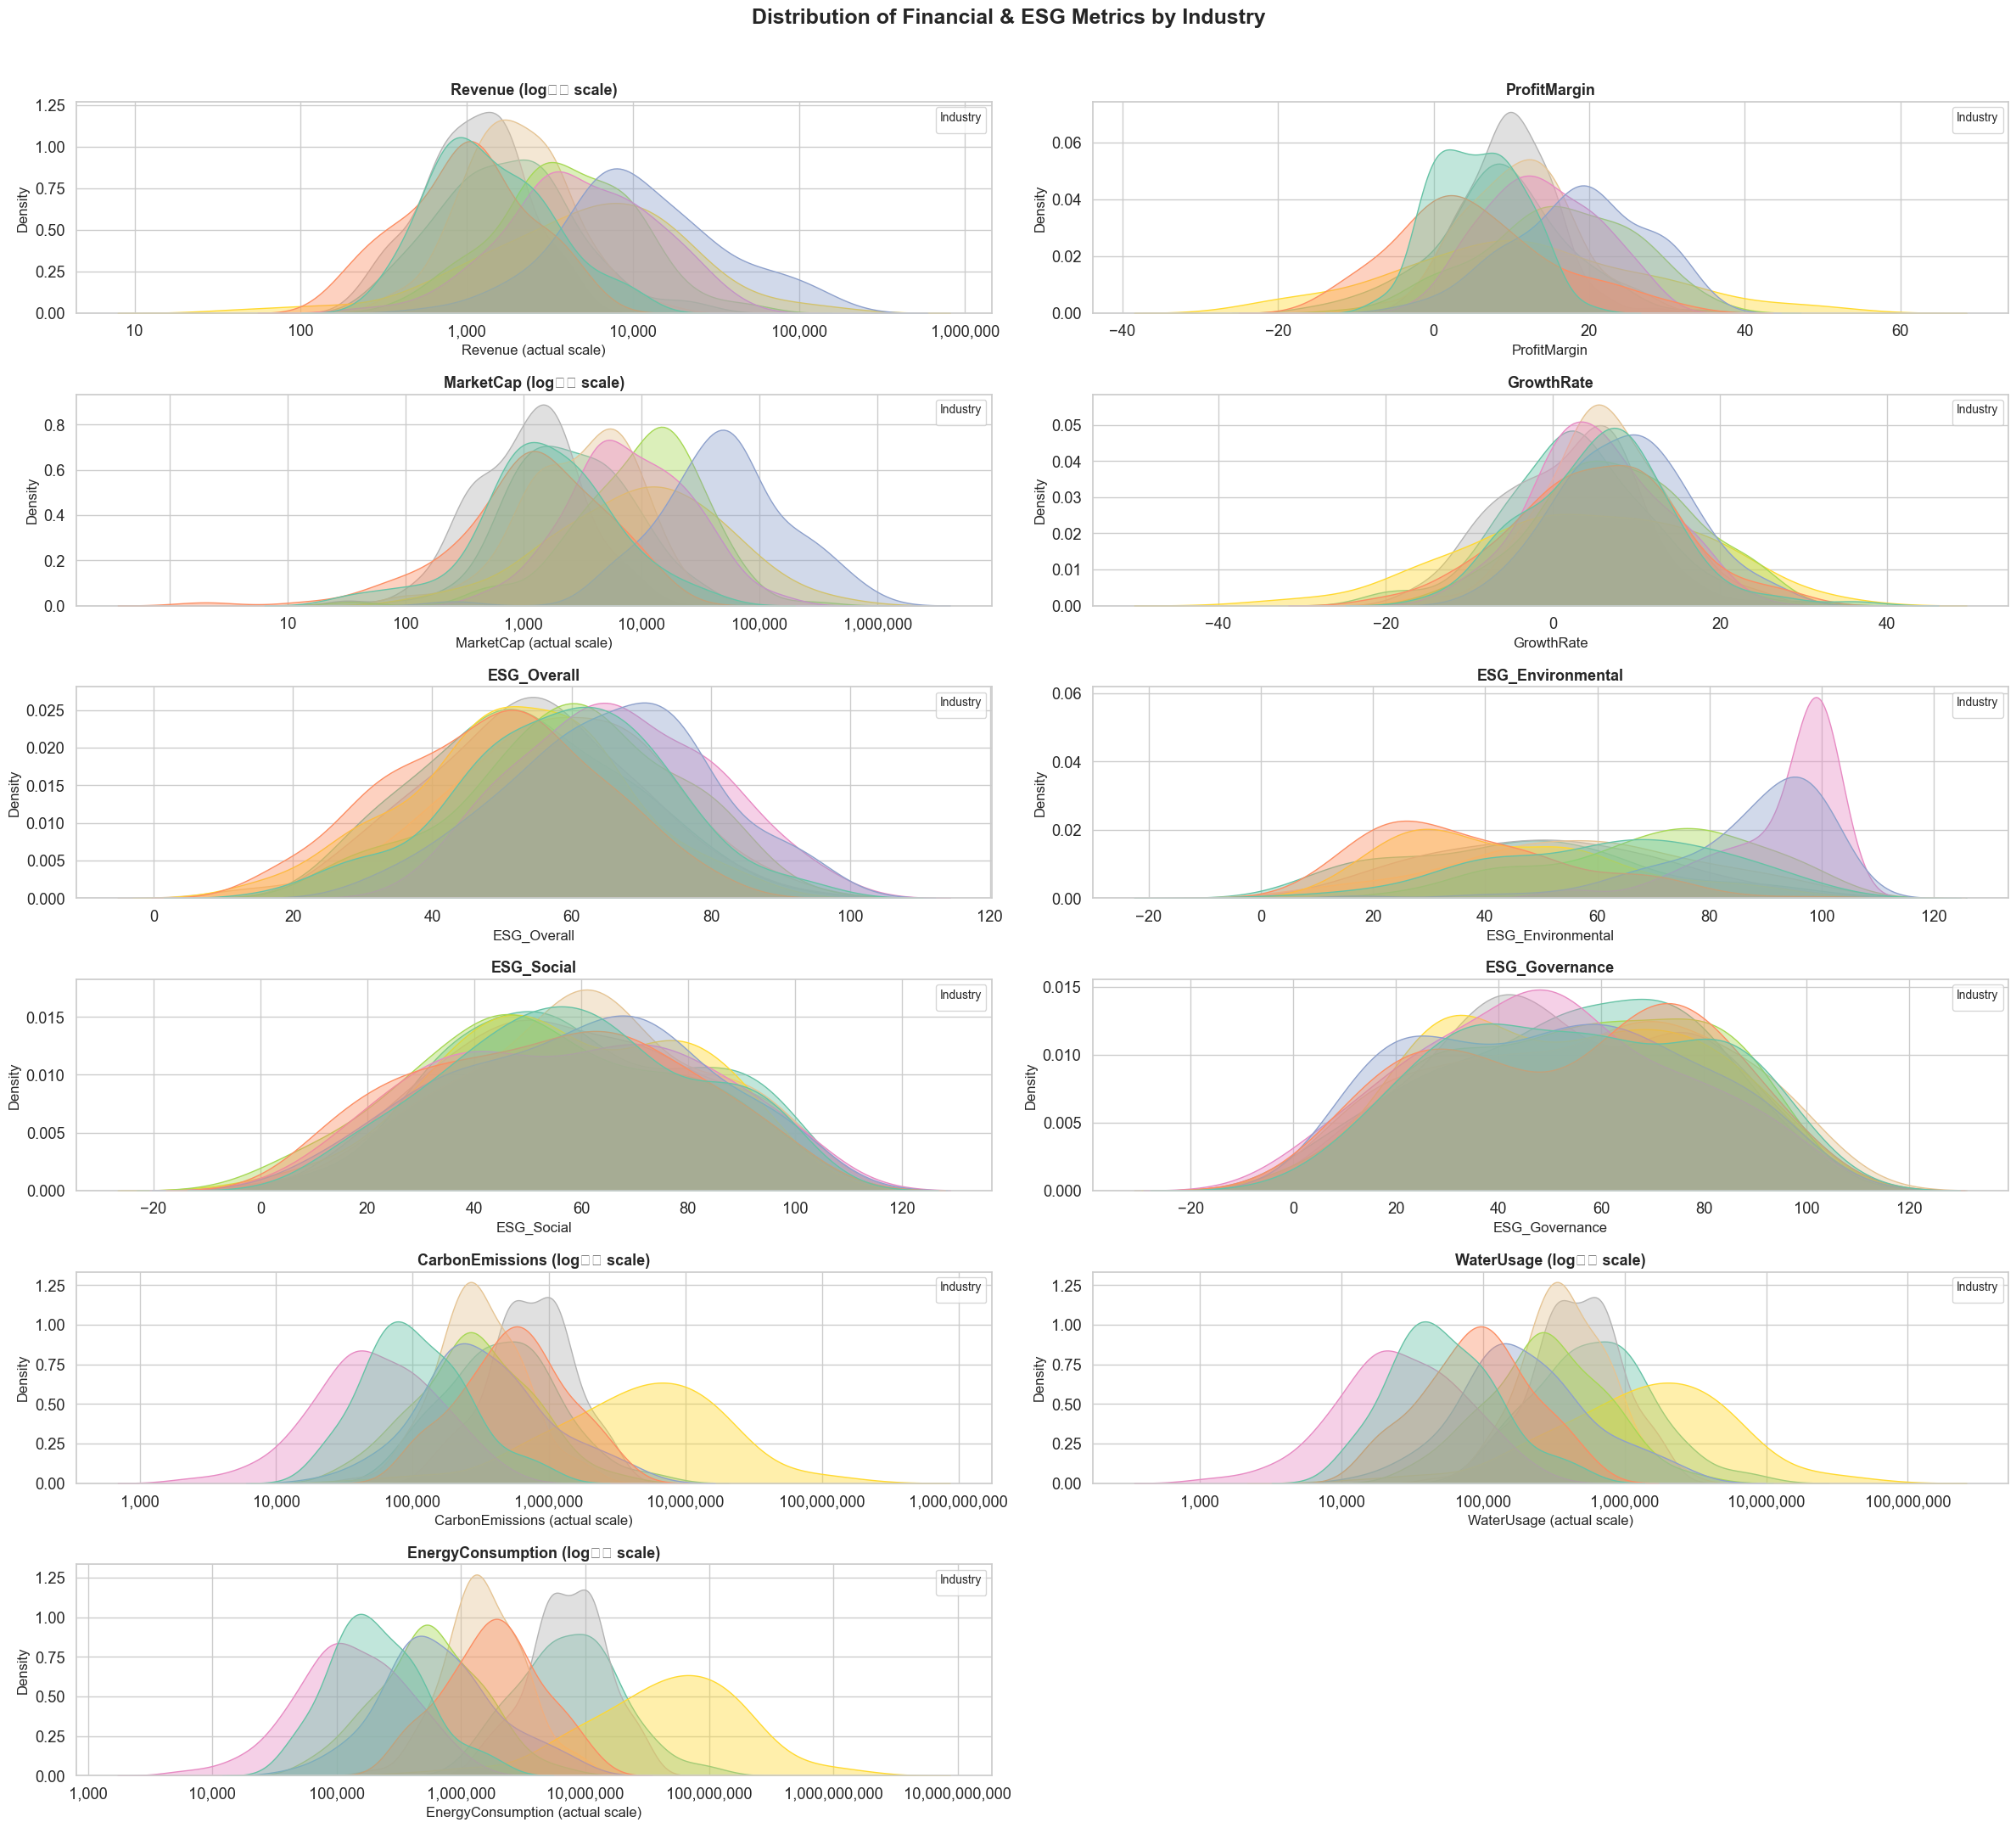

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --------------------------------------------
# 🎯 Columns to visualize (all numeric)
# --------------------------------------------
cols_to_plot = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

# Columns that should be log-scaled due to wide numeric range
wide_range_cols = ['Revenue', 'MarketCap', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']

# --------------------------------------------
# 🎨 Plot setup
# --------------------------------------------
sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("Set2", n_colors=df_final['Industry'].nunique())

n_cols = 2  # fewer columns → wider plots
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 22))
axes = axes.flatten()

# --------------------------------------------
# 📊 Plot each feature
# --------------------------------------------
for i, col in enumerate(cols_to_plot):
    ax = axes[i]

    # Handle skewed distributions with log scaling
    if col in wide_range_cols:
        df_plot = df_final.copy()
        df_plot[col] = np.log10(df_plot[col].replace(0, np.nan))
        sns.kdeplot(
            data=df_plot,
            x=col,
            hue="Industry",
            fill=True,
            common_norm=False,
            alpha=0.4,
            ax=ax,
            palette=palette
        )
        ax.set_title(f"{col} (log₁₀ scale)", fontsize=13, fontweight="bold")
        ticks = ax.get_xticks()
        ax.set_xticklabels([f"{10**t:,.0f}" if t > 0 else "" for t in ticks])
        ax.set_xlabel(f"{col} (actual scale)", fontsize=12)
    else:
        sns.kdeplot(
            data=df_final,
            x=col,
            hue="Industry",
            fill=True,
            common_norm=False,
            alpha=0.4,
            ax=ax,
            palette=palette
        )
        ax.set_title(col, fontsize=13, fontweight="bold")
        ax.set_xlabel(col, fontsize=12)

    ax.set_ylabel("Density", fontsize=12)

    # ✅ Add legend inside each plot (top-right corner)
    ax.legend(
        title="Industry",
        fontsize=9,
        title_fontsize=10,
        loc='upper right',
        frameon=True,
        facecolor='white',
        framealpha=0.8
    )

# Remove extra axes if grid has more slots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

# --------------------------------------------
# 🧭 Layout & Title
# --------------------------------------------
plt.suptitle("Distribution of Financial & ESG Metrics by Industry",
             fontsize=18, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/3509978764.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{10**t:,.0f}" if t > 0 else "" for t in ticks])
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/3509978764.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/3509978764.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/3509978764.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

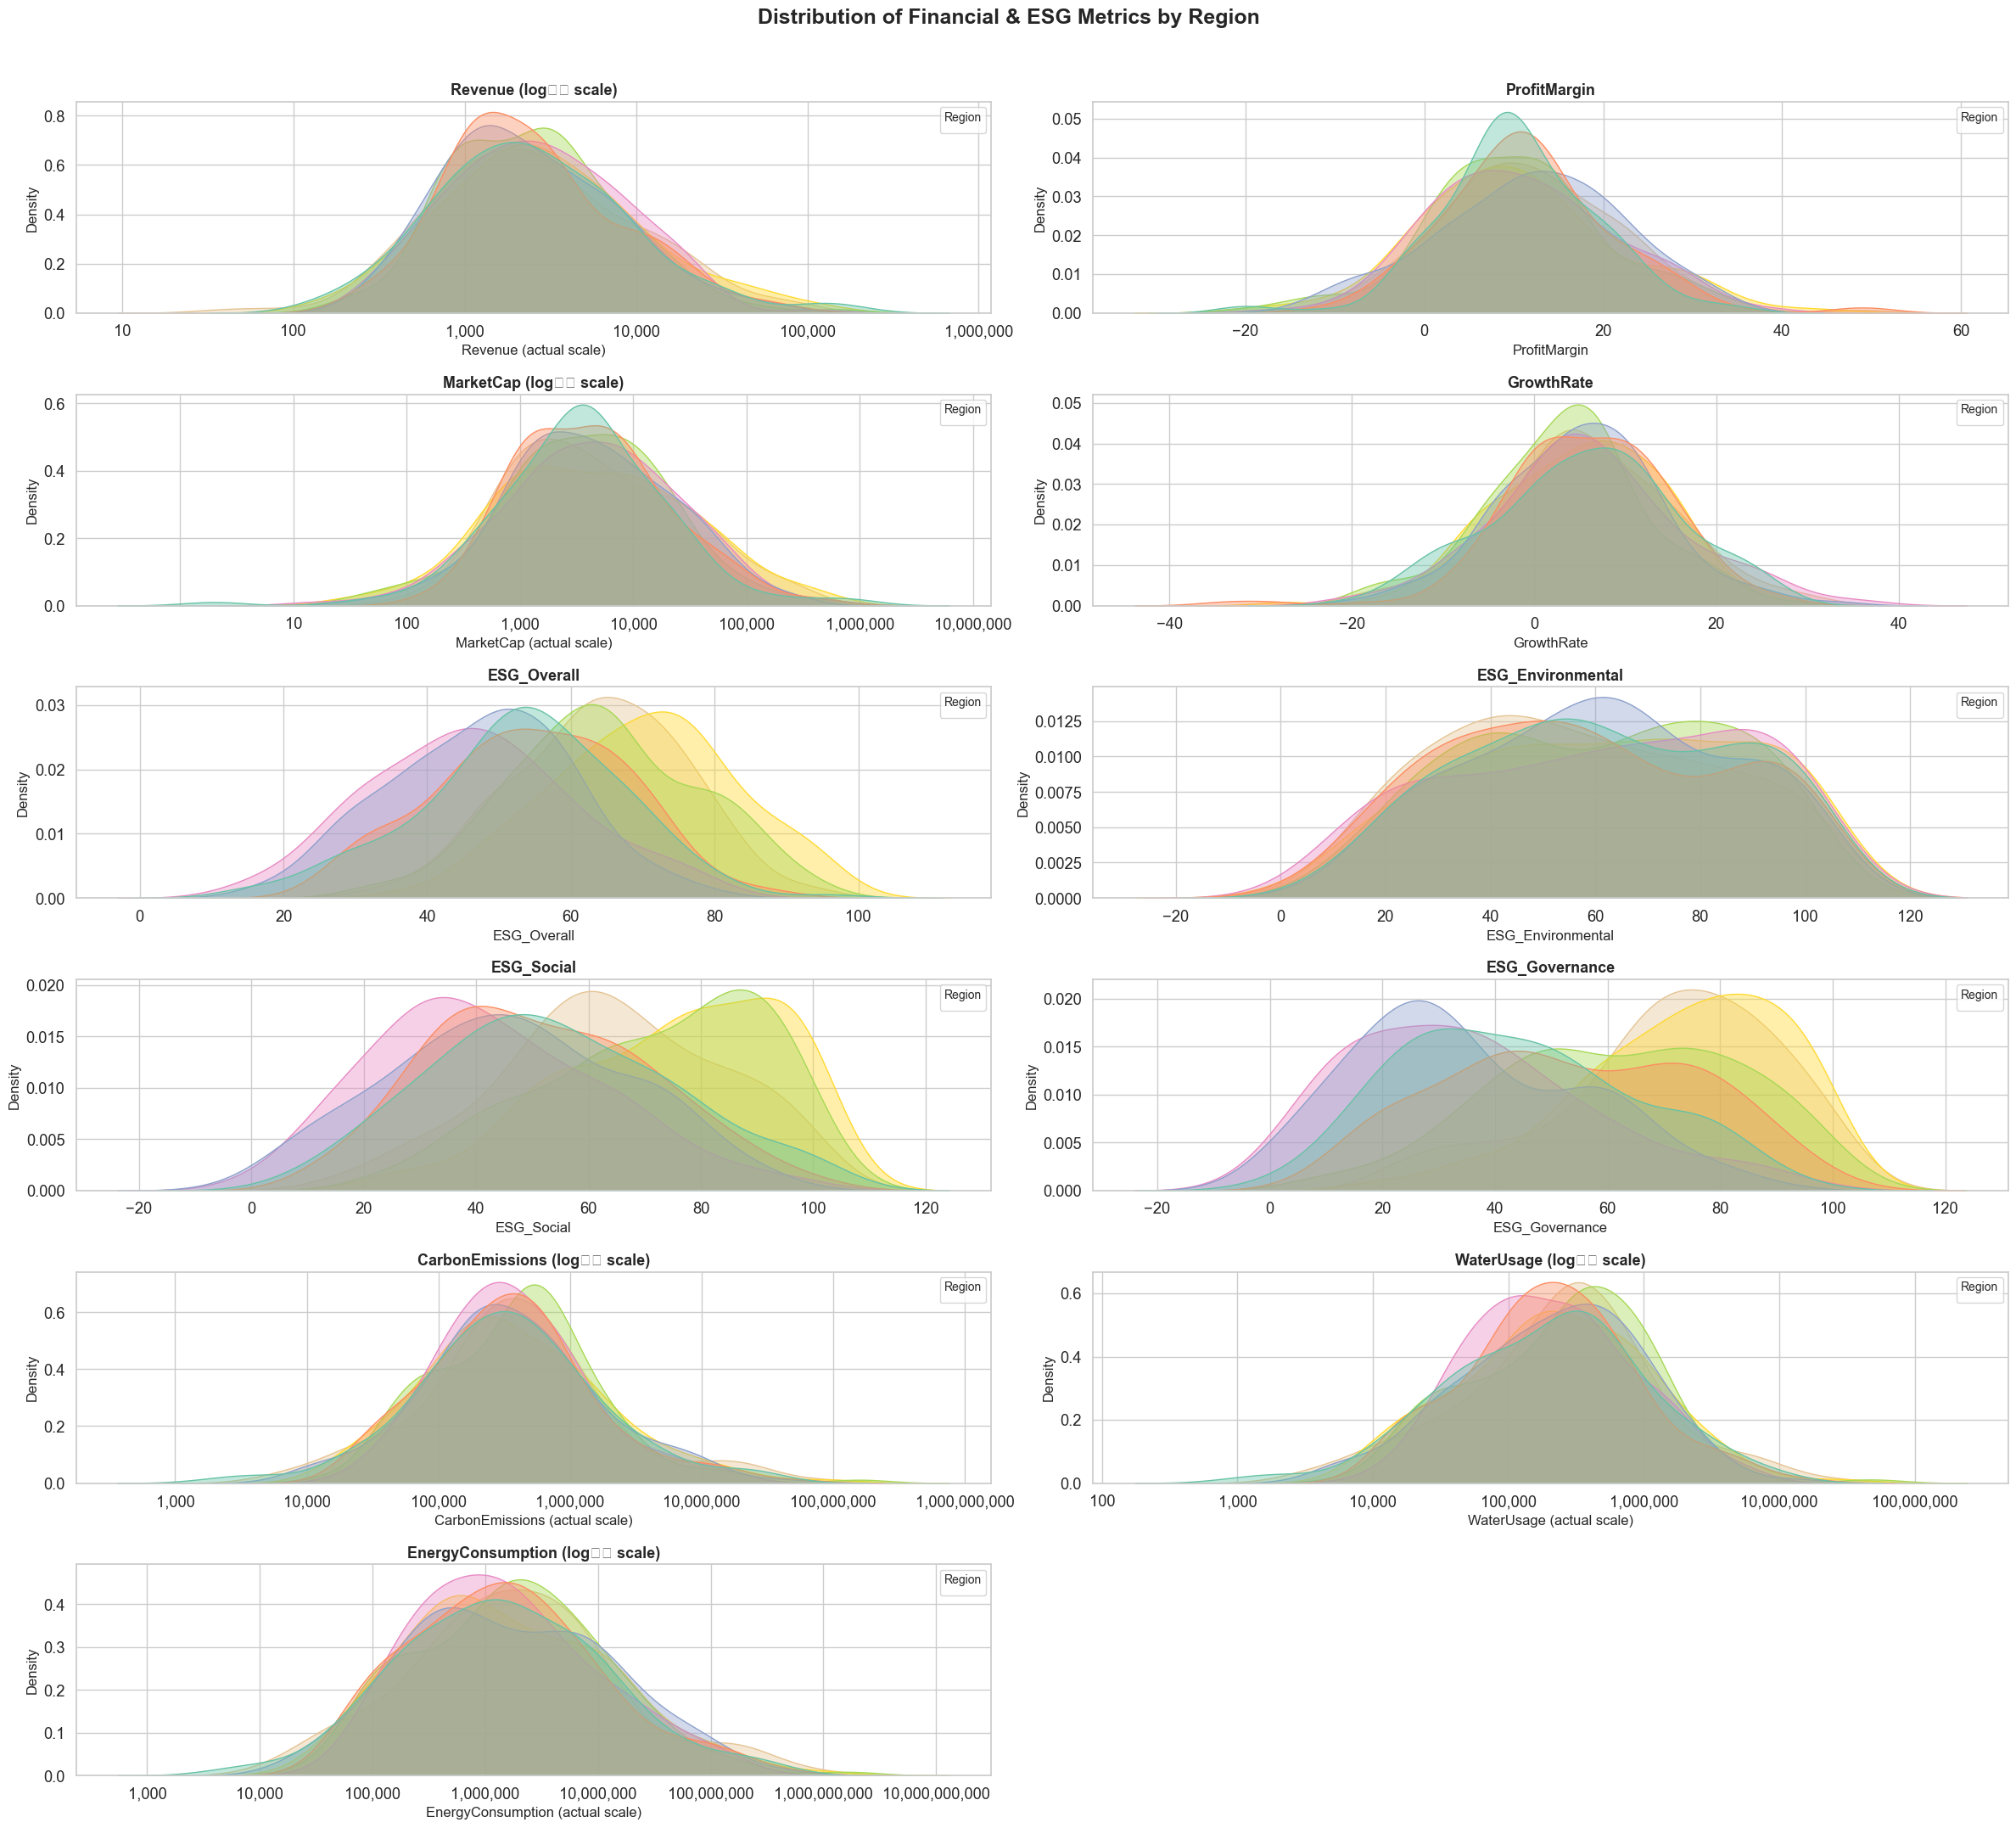

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --------------------------------------------
# 🎯 Columns to visualize (all numeric)
# --------------------------------------------
cols_to_plot = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

# Columns that should be log-scaled due to wide numeric range
wide_range_cols = ['Revenue', 'MarketCap', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']

# --------------------------------------------
# 🎨 Plot setup
# --------------------------------------------
sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("Set2", n_colors=df_final['Region'].nunique())

n_cols = 2  # fewer columns → wider plots
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 22))
axes = axes.flatten()

# --------------------------------------------
# 📊 Plot each feature
# --------------------------------------------
for i, col in enumerate(cols_to_plot):
    ax = axes[i]

    # Handle skewed distributions with log scaling
    if col in wide_range_cols:
        df_plot = df_final.copy()
        df_plot[col] = np.log10(df_plot[col].replace(0, np.nan))
        sns.kdeplot(
            data=df_plot,
            x=col,
            hue="Region",
            fill=True,
            common_norm=False,
            alpha=0.4,
            ax=ax,
            palette=palette
        )
        ax.set_title(f"{col} (log₁₀ scale)", fontsize=13, fontweight="bold")
        ticks = ax.get_xticks()
        ax.set_xticklabels([f"{10**t:,.0f}" if t > 0 else "" for t in ticks])
        ax.set_xlabel(f"{col} (actual scale)", fontsize=12)
    else:
        sns.kdeplot(
            data=df_final,
            x=col,
            hue="Region",
            fill=True,
            common_norm=False,
            alpha=0.4,
            ax=ax,
            palette=palette
        )
        ax.set_title(col, fontsize=13, fontweight="bold")
        ax.set_xlabel(col, fontsize=12)

    ax.set_ylabel("Density", fontsize=12)

    # ✅ Add legend inside each plot (top-right corner)
    ax.legend(
        title="Region",
        fontsize=9,
        title_fontsize=10,
        loc='upper right',
        frameon=True,
        facecolor='white',
        framealpha=0.8
    )

# Remove extra axes if grid has more slots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

# --------------------------------------------
# 🧭 Layout & Title
# --------------------------------------------
plt.suptitle("Distribution of Financial & ESG Metrics by Region",
             fontsize=18, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

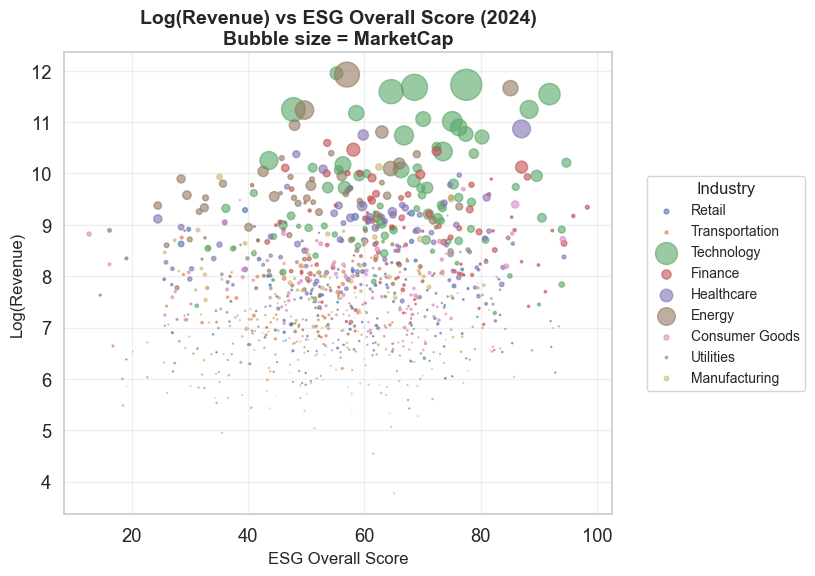

In [22]:
# Filter data for 2024
df_2024 = df[df['Year'] == 2024]

# Normalize bubble size
size_scale = 500  # Adjust this to change bubble sizes

plt.figure(figsize=(10, 6))
for industry in df_2024['Industry'].unique():
    data = df_2024[df_2024['Industry'] == industry]
    plt.scatter(
        data['ESG_Overall'],
        np.log1p(data['Revenue']),  # 将 Revenue 做 log1p 变换
        s=data['MarketCap'] / df_2024['MarketCap'].max() * size_scale,
        alpha=0.6,
        label=industry
    )

# Labels and title
plt.xlabel('ESG Overall Score', fontsize=12)
plt.ylabel('Log(Revenue)', fontsize=12)  # 改 Y 轴标签
plt.title('Log(Revenue) vs ESG Overall Score (2024)\nBubble size = MarketCap', fontsize=14, fontweight='bold')

# Legend outside on the right
plt.legend(
    title='Industry',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    fontsize=10,
    title_fontsize=12
)

plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


Select 2023-2024 dataset

In [23]:
# Filter data from df where the Year is 2023 or 2024.
df_2023_2024 = df[df['Year'].isin([2023, 2024])].copy()

In [24]:
# Sort by company and year
df_2023_2024 = df_2023_2024.sort_values(by=['CompanyID', 'Year'])

# Columns for which to calculate YoY change
cols_to_diff = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

# Compute YoY differences for each company
for col in cols_to_diff:
    df_2023_2024[f'{col}_YoY'] = df_2023_2024.groupby('CompanyID')[col].diff()

# Keep only 2024 rows
df_final = df_2023_2024[df_2023_2024['Year'] == 2024].copy()

# Display results
print(df_final.shape)
print(df_final.columns)
df_final.head(10)

(1000, 26)
Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption', 'Revenue_YoY', 'MarketCap_YoY',
       'GrowthRate_YoY', 'ESG_Overall_YoY', 'ESG_Environmental_YoY',
       'ESG_Social_YoY', 'ESG_Governance_YoY', 'CarbonEmissions_YoY',
       'WaterUsage_YoY', 'EnergyConsumption_YoY'],
      dtype='object')


CompanyID CompanyName        Industry         Region  Year   Revenue  \
9            1   Company_1          Retail  Latin America  2024     687.0   
20           2   Company_2          Retail           Asia  2024    3822.9   
31           3   Company_3  Transportation  Latin America  2024     438.0   
42           4   Company_4      Technology         Africa  2024    6555.1   
53           5   Company_5         Finance    Middle East  2024    3282.1   
64           6   Company_6  Transportation        Oceania  2024    3095.6   
75           7   Company_7      Healthcare        Oceania  2024    6084.6   
86           8   Company_8      Healthcare         Europe  2024    7168.5   
97           9   Company_9      Technology  North America  2024    5853.9   
108         10  Company_10      Technology  Latin America  2024  117939.2   

     ProfitMargin  MarketCap  GrowthRate  ESG_Overall  ...  Revenue_YoY  \
9             4.6      460.1         7.9         58.5  ...         50.3   
20           -1.2     5807.8         3.6         65.7  ...        131.3   
31           10.3      739.4         5.5         32.1  ...         22.8   
42           26.0    45451.6        12.2         63.5  ...        710.9   
53           22.5     9663.0         0.0         47.4  ...          0.4   
64           -8.6     2201.1         2.9         69.5  ...         86.1   
75           -3.6    27425.5         1.2         55.8  ...         69.8   
86           13.7    17539.0         5.3         81.4  ...        358.1   
97            6.3     5804.7        14.7         63.2  ...        751.8   
108          14.9   610070.0         9.2         68.6  ...       9910.1   

     MarketCap_YoY  GrowthRate_YoY  ESG_Overall_YoY  ESG_Environmental_YoY  \
9             86.2             0.6              0.7                    0.6   
20          3284.6           -15.2             -0.3                   -1.2   
31           240.7            -1.1             -0.2                    3.2   
42         10670.0             9.9              0.9                    0.0   
53          3221.2            -6.1              1.5                    3.9   
64         -2708.9            -6.6             -2.2                   -5.9   
75         17130.7             7.0              2.1                    0.3   
86          7673.0             1.9              1.8                    2.8   
97           582.7             5.5             -0.1                    0.6   
108       193088.0            -6.3              1.2                   -1.7   

     ESG_Social_YoY  ESG_Governance_YoY  CarbonEmissions_YoY  WaterUsage_YoY  \
9               2.9                -1.3               3332.8          1666.3   
20              1.4                -1.3              12644.9          6322.4   
31             -2.3                -1.4               8729.7          1454.9   
42              0.7                 1.8              17773.5         10664.1   
53             -0.1                 0.5              -1809.4          -904.7   
64              0.0                -0.5             114805.1         19134.2   
75              3.9                 2.3               3121.4          3121.4   
86             -0.2                 2.9              10304.0         10304.0   
97              1.1                -1.9              32001.6         19200.9   
108             0.3                 5.1             387786.7        232672.0   

     EnergyConsumption_YoY  
9                   6665.5  
20                 25289.7  
31                 29099.1  
42                 35547.1  
53                 -4523.7  
64                382683.6  
75                  6242.9  
86                 20608.0  
97                 64003.1  
108               775573.4  

[10 rows x 26 columns]

/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/1666858808.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{10**t:,.0f}" if t > 0 else "" for t in ticks])
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/1666858808.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/1666858808.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(
/var/folders/_z/cd5g6gkj7h5ccbw0cjnj65y80000gn/T/ipykernel_4626/1666858808.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

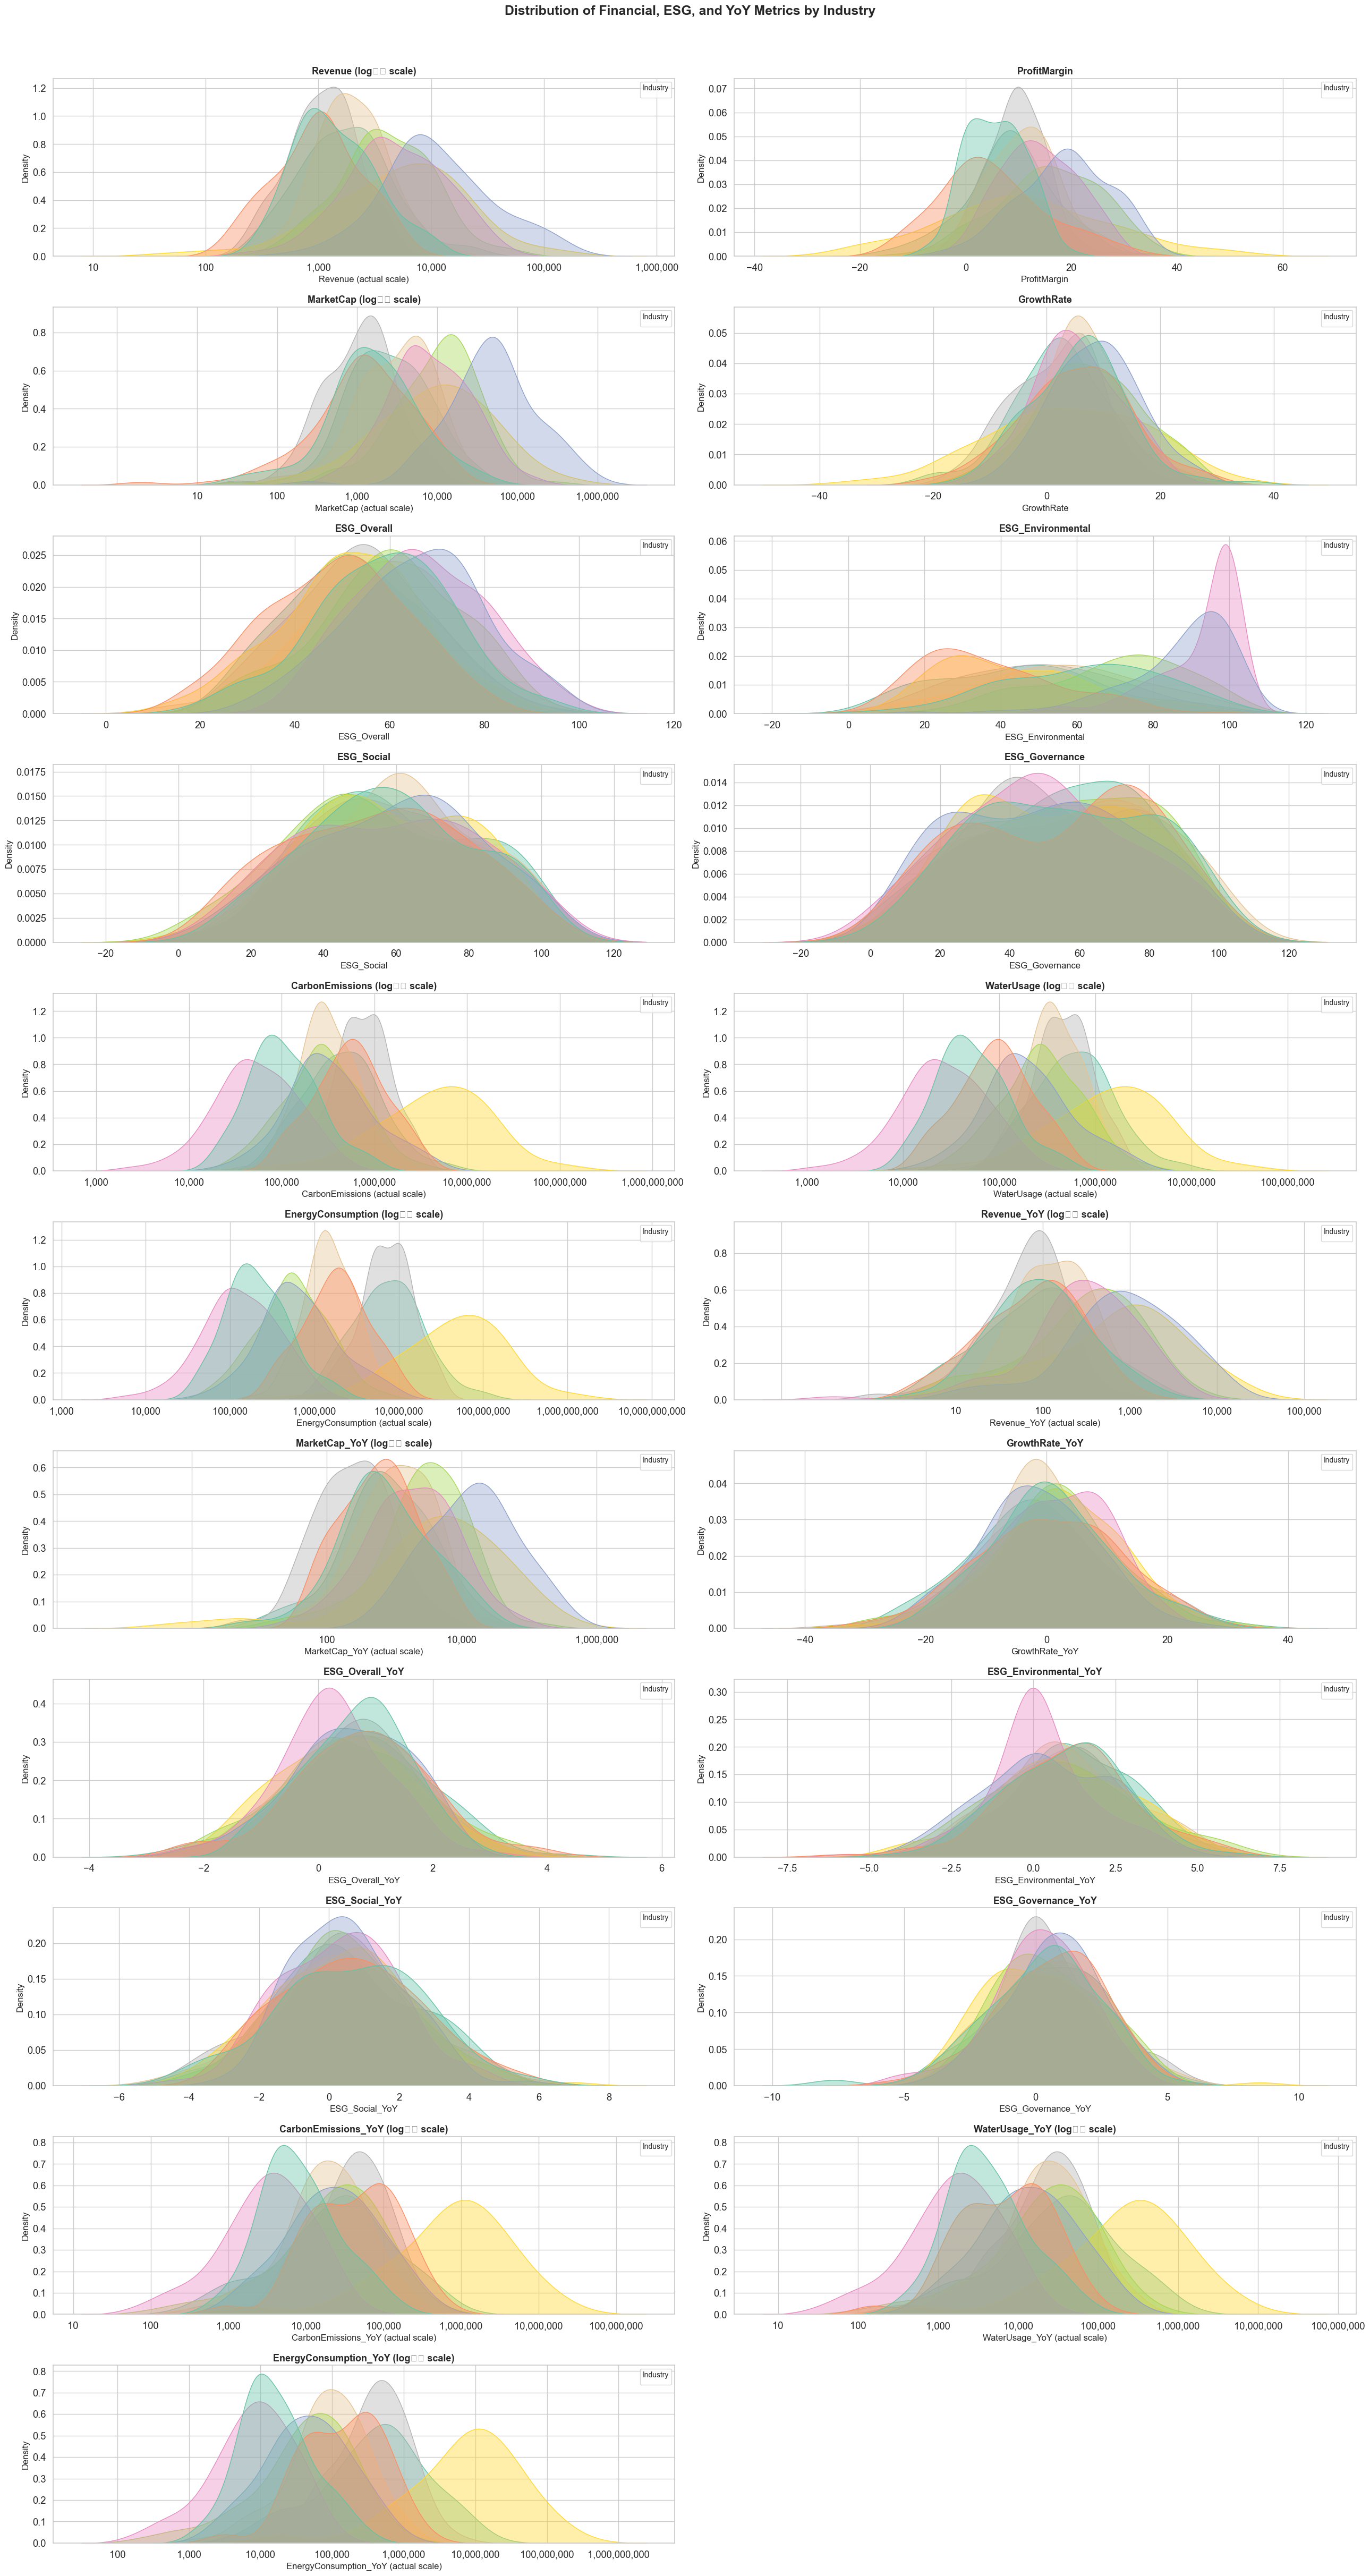

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ==========================================
# 🎯 Columns to visualize (from df_final)
# ==========================================
cols_to_plot = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

# Columns that need log scaling (high numeric range)
wide_range_cols = [
    'Revenue', 'MarketCap', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

# ==========================================
# 🎨 Plot setup
# ==========================================
sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("Set2", n_colors=df_final['Industry'].nunique())

n_cols = 2  # fewer columns → wider plots
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 4.5))
axes = axes.flatten()

# ==========================================
# 📊 Plot each feature
# ==========================================
for i, col in enumerate(cols_to_plot):
    ax = axes[i]

    if col in wide_range_cols:
        df_plot = df_final.copy()
        df_plot[col] = np.log10(df_plot[col].replace(0, np.nan))
        sns.kdeplot(
            data=df_plot,
            x=col,
            hue="Industry",
            fill=True,
            common_norm=False,
            alpha=0.4,
            ax=ax,
            palette=palette
        )
        ax.set_title(f"{col} (log₁₀ scale)", fontsize=13, fontweight="bold")
        ticks = ax.get_xticks()
        ax.set_xticklabels([f"{10**t:,.0f}" if t > 0 else "" for t in ticks])
        ax.set_xlabel(f"{col} (actual scale)", fontsize=12)
    else:
        sns.kdeplot(
            data=df_final,
            x=col,
            hue="Industry",
            fill=True,
            common_norm=False,
            alpha=0.4,
            ax=ax,
            palette=palette
        )
        ax.set_title(col, fontsize=13, fontweight="bold")
        ax.set_xlabel(col, fontsize=12)

    ax.set_ylabel("Density", fontsize=12)

    # ✅ Show legend inside each plot
    ax.legend(
        title="Industry",
        fontsize=9,
        title_fontsize=10,
        loc='upper right',
        frameon=True,
        facecolor='white',
        framealpha=0.8
    )

# Remove unused axes if grid has more slots than plots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

# ==========================================
# 🧭 Layout & Title
# ==========================================
plt.suptitle("Distribution of Financial, ESG, and YoY Metrics by Industry",
             fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

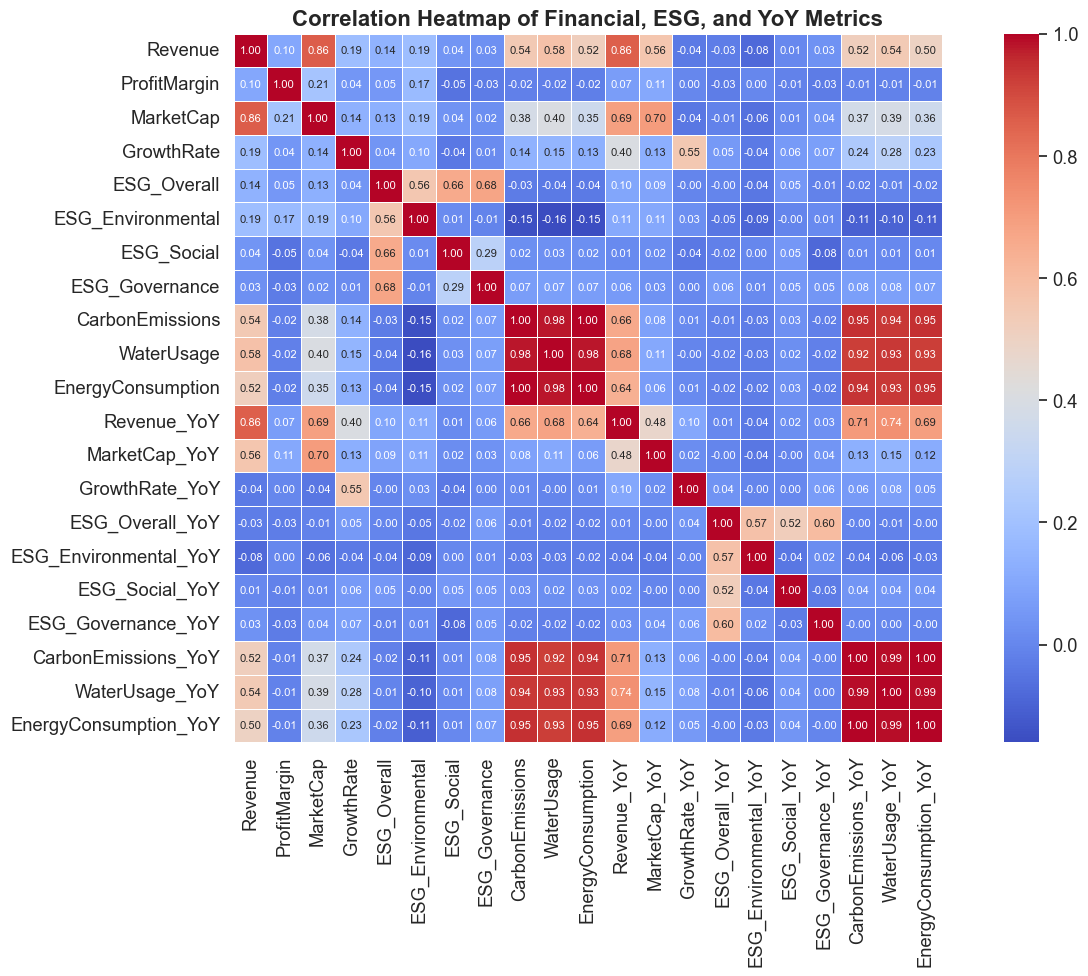

In [26]:
# Select only numeric columns that make sense for correlation
numeric_cols = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY',
    'ESG_Governance_YoY', 'CarbonEmissions_YoY', 'WaterUsage_YoY',
    'EnergyConsumption_YoY'
]

# Compute correlation matrix
corr = df_final[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={'size': 8}
)

plt.title('Correlation Heatmap of Financial, ESG, and YoY Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# ============================================
# 📦 Imports
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GroupKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Regressors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


# ============================================
# ⚙️ Feature setup
# ============================================
target = 'ProfitMargin'
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

# ESG vs non-ESG split
esg_cols = [c for c in numeric_cols if "ESG" in c]
non_esg_cols = [c for c in numeric_cols if c not in esg_cols]

X = df_final[categorical_cols + numeric_cols]
y = df_final[target]
groups = df_final['Industry']  # Grouping variable for GroupKFold

X_train, X_test, y_train, y_test, groups_train, groups_test = train_test_split(
    X, y, groups, test_size=0.2, random_state=42, stratify=None
)


# ============================================
# 🧠 Custom Transformers
# ============================================

class ESGImputerAdder(BaseEstimator, TransformerMixin):
    """Impute ESG numeric columns but keep Industry untouched."""
    def __init__(self, esg_cols, group_col='Industry'):
        self.esg_cols = esg_cols
        self.group_col = group_col
        self.imputer = SimpleImputer(strategy='median')
    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        self.imputer.fit(df[self.esg_cols])
        return self
    def transform(self, X):
        df = pd.DataFrame(X).copy()
        df[self.esg_cols] = self.imputer.transform(df[self.esg_cols])
        return df


class IndustryGroupScaler(BaseEstimator, TransformerMixin):
    """Scale ESG columns within each Industry group separately."""
    def __init__(self, group_col='Industry'):
        self.group_col = group_col
        self.scalers_ = {}

    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        for ind in df[self.group_col].unique():
            subset = df[df[self.group_col] == ind].drop(columns=[self.group_col])
            scaler = StandardScaler().fit(subset)
            self.scalers_[ind] = scaler
        return self

    def transform(self, X):
        df = pd.DataFrame(X).copy()
        transformed = []
        for ind, group in df.groupby(self.group_col):
            if ind in self.scalers_:
                scaled_vals = self.scalers_[ind].transform(group.drop(columns=[self.group_col]))
                scaled_df = pd.DataFrame(scaled_vals, columns=group.drop(columns=[self.group_col]).columns, index=group.index)
                transformed.append(scaled_df)
            else:
                transformed.append(group.drop(columns=[self.group_col]))
        return pd.concat(transformed).sort_index()


# ============================================
# 🧩 Preprocessing Pipeline
# ============================================
esg_pipeline = Pipeline([
    ('impute_esg', ESGImputerAdder(esg_cols, group_col='Industry')),
    ('industry_scaler', IndustryGroupScaler(group_col='Industry'))
])

non_esg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('esg', esg_pipeline, esg_cols + ['Industry']),
    ('num', non_esg_pipeline, non_esg_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


# ============================================
# 🤖 Models and Search Spaces
# ============================================
models = {
    "RandomForest": (RandomForestRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__max_depth': Integer(3, 15),
        'regressor__min_samples_split': Integer(2, 10),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=42, n_jobs=-1), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__subsample': Real(0.5, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=42), {
        'regressor__depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__iterations': Integer(100, 400)
    }),
    "SVR": (SVR(), {
        'regressor__C': Real(0.1, 10.0, prior='log-uniform'),
        'regressor__epsilon': Real(0.01, 0.5, prior='log-uniform'),
        'regressor__kernel': ['rbf', 'poly', 'sigmoid']
    })
}


# ============================================
# 🔍 GroupKFold Cross-Validation + Bayesian Optimization
# ============================================
cv = GroupKFold(n_splits=5)
scorer = make_scorer(r2_score)

results = []
best_models = {}

for name, (regressor, search_space) in models.items():
    print(f"\n🔹 Optimizing {name} with GroupKFold by Industry...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=15,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    opt.fit(X_train, y_train, groups=groups_train)
    best_model = opt.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "Test R²": r2,
        "Test MAE": mae,
        "Test RMSE": rmse
    })

results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)
print("\n✅ Model Comparison (GroupKFold by Industry):")
print(results_df)


# ============================================
# 🏆 Best Model
# ============================================
best_model_name = results_df.iloc[0]["Model"]
print(f"\n🏆 Best performing model (GroupKFold): {best_model_name} with R² = {results_df.iloc[0]['Test R²']:.4f}")

In [30]:
# ============================================
# 📦 Imports
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GroupKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from skopt import BayesSearchCV
from skopt.space import Real, Integer


# ============================================
# 🧮 Step 1: 計算所有年份的 YoY（公司內逐年）
# ============================================
df_all = df.sort_values(by=['CompanyID', 'Year']).copy()

cols_to_diff = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

for col in cols_to_diff:
    df_all[f'{col}_YoY'] = df_all.groupby('CompanyID')[col].diff()

df_final = df_all.dropna(subset=[f'{cols_to_diff[0]}_YoY']).reset_index(drop=True)

print("✅ df_final created successfully with YoY for all years.")
print("Shape:", df_final.shape)
print("Years included:", df_final['Year'].unique())


# ============================================
# ⚙️ Step 2: Define Features and Target
# ============================================
target = 'ProfitMargin'
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

X = df_final[categorical_cols + numeric_cols]
y = df_final[target]
groups = df_final['CompanyID']


# ============================================
# 🧠 Step 3: Custom Industry-Based Scaler
# ============================================
class IndustryGroupScaler(BaseEstimator, TransformerMixin):
    """Scale numeric columns within each Industry group."""
    def __init__(self, group_col='Industry'):
        self.group_col = group_col
        self.scalers_ = {}
        self.imputer = SimpleImputer(strategy='median')

    def fit(self, X, y=None):
        df = pd.DataFrame(X).copy()
        df[numeric_cols] = self.imputer.fit_transform(df[numeric_cols])
        for ind in df[self.group_col].unique():
            subset = df[df[self.group_col] == ind][numeric_cols]
            scaler = StandardScaler().fit(subset)
            self.scalers_[ind] = scaler
        return self

    def transform(self, X):
        df = pd.DataFrame(X).copy()
        df[numeric_cols] = self.imputer.transform(df[numeric_cols])
        scaled_parts = []
        for ind, group in df.groupby(self.group_col):
            subset = group[numeric_cols]
            if ind in self.scalers_:
                scaled_vals = self.scalers_[ind].transform(subset)
                scaled_df = pd.DataFrame(
                    scaled_vals, columns=subset.columns, index=subset.index
                )
                scaled_parts.append(scaled_df)
            else:
                scaled_parts.append(subset)
        return pd.concat(scaled_parts).sort_index()


# ============================================
# 🧩 Step 4: Preprocessor (fixed categorical encoding)
# ============================================
# Numeric pipeline – includes scaling by industry
numeric_pipeline = Pipeline([
    ('industry_scaler', IndustryGroupScaler(group_col='Industry'))
])

# Categorical pipeline – simple one-hot encoding
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer
# 👉 Industry is used only for scaling context inside numeric pipeline, NOT as input to numeric_cols
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols + ['Industry']),  # industry used internally, not transformed
    ('cat', categorical_pipeline, categorical_cols)
])


# ============================================
# 🧱 Step 5: Feature Engineering Preview
# ============================================
sample_X = X.head(10).copy()
sample_transformed = preprocessor.fit_transform(sample_X)

encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
encoded_cols = encoder.get_feature_names_out(categorical_cols)
engineered_features = list(numeric_cols) + list(encoded_cols)

print("\n🧩 Raw features sample:")
display(sample_X.head(3))

print("\n🚀 Transformed feature matrix (first 3 rows):")
transformed_df = pd.DataFrame(sample_transformed, columns=engineered_features)
display(transformed_df.head(3))


# ============================================
# 🤖 Step 6: Models and Search Spaces
# ============================================
models = {
    "LinearRegression": (LinearRegression(), {}),
    "RandomForest": (RandomForestRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 300),
        'regressor__max_depth': Integer(3, 15)
    }),
    "XGBoost": (XGBRegressor(random_state=42, n_jobs=-1), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=42), {
        'regressor__depth': Integer(3, 10),
        'regressor__iterations': Integer(100, 400)
    }),
    "LightGBM": (LGBMRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__num_leaves': Integer(20, 100)
    })
}


# ============================================
# 🔍 Step 7: Train & Evaluate with GroupKFold
# ============================================
cv = GroupKFold(n_splits=5)
scorer = make_scorer(r2_score)

results = []
best_models = {}

for name, (regressor, search_space) in models.items():
    print(f"\n🔹 Training {name} (GroupKFold by Company)...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    if search_space:
        opt = BayesSearchCV(
            estimator=pipeline,
            search_spaces=search_space,
            n_iter=10,
            cv=cv,
            scoring=scorer,
            n_jobs=-1,
            random_state=42,
            verbose=0
        )
        opt.fit(X, y, groups=groups)
        best_model = opt.best_estimator_
    else:
        best_model = pipeline.fit(X, y)

    best_models[name] = best_model
    y_pred = best_model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    results.append({
        "Model": name,
        "R²": r2,
        "MAE": mae,
        "RMSE": rmse
    })


# ============================================
# 📊 Step 8: Model Results
# ============================================
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\n✅ Model Performance (GroupKFold by Company):")
display(results_df)


# ============================================
# 🏆 Step 9: Feature Importance for Best Model
# ============================================
best_model_name = results_df.iloc[0]['Model']
best_model = best_models[best_model_name]
print(f"\n🏆 Best performing model: {best_model_name}")

if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    importances = best_model.named_steps['regressor'].feature_importances_
    feat_imp = pd.DataFrame({'Feature': engineered_features, 'Importance': importances})
    feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
    plt.title(f"Top 15 Feature Importances — {best_model_name}", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ {best_model_name} does not expose feature importances.")

✅ df_final created successfully with YoY for all years.
Shape: (10000, 27)
Years included: [2016 2017 2018 2019 2020 2021 2022 2023 2024 2025]

🧩 Raw features sample:


Industry         Region  Revenue  MarketCap  GrowthRate  ESG_Overall  \
0   Retail  Latin America    473.8      366.6         3.2         56.7   
1   Retail  Latin America    564.9      313.4        19.2         56.5   
2   Retail  Latin America    558.4      283.0        -1.1         58.0   

   ESG_Environmental  ESG_Social  ESG_Governance  CarbonEmissions  ...  \
0               58.9        32.8            78.5          37314.7  ...   
1               57.6        34.0            77.8          45006.4  ...   
2               62.3        33.4            78.3          42650.1  ...   

   Revenue_YoY  MarketCap_YoY  GrowthRate_YoY  ESG_Overall_YoY  \
0         14.6           29.1             NaN             -0.3   
1         91.1          -53.2            16.0             -0.2   
2         -6.5          -30.4           -20.3              1.5   

   ESG_Environmental_YoY  ESG_Social_YoY  ESG_Governance_YoY  \
0                   -1.8            -0.7                 1.7   
1                   -1.3             1.2                -0.7   
2                    4.7            -0.6                 0.5   

   CarbonEmissions_YoY  WaterUsage_YoY  EnergyConsumption_YoY  
0               1737.3           868.7                 3474.7  
1               7691.7          3845.8                15383.5  
2              -2356.3         -1178.1                -4712.7  

[3 rows x 22 columns]


🚀 Transformed feature matrix (first 3 rows):


Revenue  MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  \
0 -1.766326  -0.363594   -0.300189    -0.467710          -1.474082   
1 -0.465184  -0.835725    2.413387    -0.644204          -1.781676   
2 -0.558020  -1.105514   -1.029463     0.679503          -0.669607   

   ESG_Social  ESG_Governance  CarbonEmissions  WaterUsage  EnergyConsumption  \
0    1.118021        1.027734        -1.802746   -1.802745          -1.802750   
1    1.555032        0.589067         0.186084    0.186078           0.186093   
2    1.336526        0.902400        -0.423181   -0.423167          -0.423184   

   ...  GrowthRate_YoY  ESG_Overall_YoY  ESG_Environmental_YoY  \
0  ...        0.018478        -0.518035              -1.546985   
1  ...        1.692330        -0.418413              -1.270738   
2  ...       -2.253180         1.275164               2.044230   

   ESG_Social_YoY  ESG_Governance_YoY  CarbonEmissions_YoY  WaterUsage_YoY  \
0       -0.139407            0.976948             0.040849        0.040885   
1        0.879334           -0.507024             2.165861        2.165863   
2       -0.085789            0.234962            -1.420080       -1.420068   

   EnergyConsumption_YoY  Industry_Retail  Region_Latin America  
0               0.040863              1.0                   1.0  
1               2.165859              1.0                   1.0  
2              -1.420090              1.0                   1.0  

[3 rows x 22 columns]


🔹 Training LinearRegression (GroupKFold by Company)...

🔹 Training RandomForest (GroupKFold by Company)...

🔹 Training XGBoost (GroupKFold by Company)...

🔹 Training CatBoost (GroupKFold by Company)...

🔹 Training LightGBM (GroupKFold by Company)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Number of data points in the train set: 8000, numbe

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.816150
[LightGBM] [Info] Start training from score 10.881388
[LightGBM] [Info] Start trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 11.022725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.881388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.816150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 11.022725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.881388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 11.004900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 11.022725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.816150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 11.022725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.816150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 11.022725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.881388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.816150
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.881388
[LightGBM] [Info] Start trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start training from score 10.881388
[LightGBM] [Info] Start training from score 11.004900
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 36
[LightGBM] [Info] Start trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5132
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 36
[LightGBM] [Info] Start training from score 10.902590

✅ Model Performance (GroupKFold by Company):


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Model        R²       MAE      RMSE
2           XGBoost  0.878447  2.088805  3.111252
1      RandomForest  0.874104  1.994780  3.166343
4          LightGBM  0.809221  2.706962  3.897782
3          CatBoost  0.647516  3.551052  5.298127
0  LinearRegression  0.324351  5.227697  7.335218


🏆 Best performing model: XGBoost


ValueError: All arrays must be of the same length

In [29]:
# ============================================
# 📦 Imports
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import GroupKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer


# ============================================
# 🧮 Step 1: Prepare Data
# ============================================
df_all = df.sort_values(by=['CompanyID', 'Year']).copy()

cols_to_diff = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

for col in cols_to_diff:
    df_all[f'{col}_YoY'] = df_all.groupby('CompanyID')[col].diff()

df_final = df_all.dropna(subset=[f'{cols_to_diff[0]}_YoY']).reset_index(drop=True)
print("✅ df_final created successfully with YoY for all years.")
print("Shape:", df_final.shape)


# ============================================
# ⚙️ Step 2: Define Features
# ============================================
target = 'ProfitMargin'
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

X_raw = df_final[categorical_cols + numeric_cols]
y_raw = df_final[target]
groups = df_final['CompanyID']


# ============================================
# 🧠 Step 3: Custom Scaler
# ============================================
class IndustryGroupScaler(BaseEstimator, TransformerMixin):
    def __init__(self, group_col='Industry'):
        self.group_col = group_col
        self.scalers_ = {}

    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        for ind in df[self.group_col].unique():
            subset = df[df[self.group_col] == ind].drop(columns=[self.group_col])
            scaler = StandardScaler().fit(subset)
            self.scalers_[ind] = scaler
        return self

    def transform(self, X):
        df = pd.DataFrame(X).copy()
        scaled_parts = []
        for ind, group in df.groupby(self.group_col):
            if ind in self.scalers_:
                scaled_vals = self.scalers_[ind].transform(group.drop(columns=[self.group_col]))
                scaled_df = pd.DataFrame(scaled_vals, columns=group.drop(columns=[self.group_col]).columns, index=group.index)
                scaled_parts.append(scaled_df)
            else:
                scaled_parts.append(group.drop(columns=[self.group_col]))
        return pd.concat(scaled_parts).sort_index()


# ============================================
# 🧩 Step 4: Preprocessor
# ============================================
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('industry_scaler', IndustryGroupScaler(group_col='Industry'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols + ['Industry']),
    ('cat', categorical_pipeline, categorical_cols)
])


# ============================================
# ⚙️ Step 5: Evaluation Function
# ============================================
def evaluate_model(model, X, y, groups=None, use_preprocessor=True, tune=False, model_name=None):
    cv = GroupKFold(n_splits=5)
    scorer = make_scorer(r2_score)

    pipeline = Pipeline([
        ('preprocessor', preprocessor if use_preprocessor else 'passthrough'),
        ('regressor', model)
    ])

    if tune:
        search_spaces = {
            'RandomForest': {
                'regressor__n_estimators': Integer(100, 400),
                'regressor__max_depth': Integer(3, 15)
            },
            'XGBoost': {
                'regressor__n_estimators': Integer(100, 400),
                'regressor__max_depth': Integer(3, 10),
                'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
            },
            'CatBoost': {
                'regressor__depth': Integer(3, 10),
                'regressor__iterations': Integer(100, 400),
                'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
            },
            'LightGBM': {
                'regressor__n_estimators': Integer(100, 400),
                'regressor__num_leaves': Integer(20, 100),
                'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
            }
        }
        if model_name in search_spaces:
            opt = BayesSearchCV(
                estimator=pipeline,
                search_spaces=search_spaces[model_name],
                n_iter=66,
                cv=cv,
                scoring=scorer,
                n_jobs=-1,
                random_state=42,
                verbose=0
            )
            opt.fit(X, y, groups=groups)
            model_fitted = opt.best_estimator_
        else:
            model_fitted = pipeline.fit(X, y)
    else:
        model_fitted = pipeline.fit(X, y)

    preds = model_fitted.predict(X)
    r2 = r2_score(y, preds)
    mae = mean_absolute_error(y, preds)
    rmse = np.sqrt(mean_squared_error(y, preds))

    return model_fitted, r2, mae, rmse


# ============================================
# 🚀 Step 6: Train All Models
# ============================================
base_models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

results = []

for name, model in base_models.items():
    print(f"\n🧩 Baseline: {name}")
    _, r2_base, mae_base, rmse_base = evaluate_model(model, X_raw, y_raw, groups=groups, use_preprocessor=True)
    results.append({"Stage": "Baseline", "Model": name, "R²": r2_base, "MAE": mae_base, "RMSE": rmse_base})

    print(f"\n⚙️ Hyperparameter Tuning: {name}")
    _, r2_tuned, mae_tuned, rmse_tuned = evaluate_model(model, X_raw, y_raw, groups=groups, use_preprocessor=True, tune=True, model_name=name)
    results.append({"Stage": "Tuned", "Model": name, "R²": r2_tuned, "MAE": mae_tuned, "RMSE": rmse_tuned})


# ============================================
# 📊 Step 7: Compare Results
# ============================================
results_df = pd.DataFrame(results).sort_values(by=["Model", "Stage"])
print("\n✅ Model Performance Comparison:")
display(results_df)


# ============================================
# 🧠 Step 8: SHAP (Optional)
# ============================================
try:
    best_row = results_df.sort_values(by='R²', ascending=False).iloc[0]
    best_model_name = best_row['Model']
    print(f"\n🏆 Best model: {best_model_name}")

    best_model_fitted, _, _, _ = evaluate_model(base_models[best_model_name], X_raw, y_raw, groups=groups, use_preprocessor=True)
    preprocessor_fitted = best_model_fitted.named_steps['preprocessor']
    X_transformed = preprocessor_fitted.fit_transform(X_raw)

    encoder = preprocessor_fitted.named_transformers_['cat'].named_steps['encoder']
    encoded_cols = encoder.get_feature_names_out(categorical_cols)
    final_features = numeric_cols + list(encoded_cols)

    explainer = shap.Explainer(best_model_fitted.named_steps['regressor'], X_transformed)
    shap_values = explainer(X_transformed)
    shap.summary_plot(shap_values, features=X_transformed, feature_names=final_features, plot_size=(10, 6))
except Exception as e:
    print("⚠️ SHAP skipped:", e)

✅ df_final created successfully with YoY for all years.
Shape: (10000, 27)

🧩 Baseline: LinearRegression


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Retail'

In [ ]:
# ============================================
# 📦 Imports
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Regressors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


# ============================================
# ⚙️ Feature setup
# ============================================
target = 'ProfitMargin'
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

X = df_final[categorical_cols + numeric_cols]
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ============================================
# 🧩 Preprocessing Pipeline
# ============================================
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


# ============================================
# 🤖 Models and Search Spaces (LightGBM Removed)
# ============================================
models = {
    "RandomForest": (RandomForestRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 500),
        'regressor__max_depth': Integer(3, 15),
        'regressor__min_samples_split': Integer(2, 10),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 500),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=42, n_jobs=-1), {
        'regressor__n_estimators': Integer(100, 500),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__subsample': Real(0.5, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=42), {
        'regressor__depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__iterations': Integer(100, 500)
    }),
    "SVR": (SVR(), {
        'regressor__C': Real(0.1, 10.0, prior='log-uniform'),
        'regressor__epsilon': Real(0.01, 0.5, prior='log-uniform'),
        'regressor__kernel': ['rbf', 'poly', 'sigmoid']
    })
}


# ============================================
# 🔍 Bayesian Optimization + Cross-Validation
# ============================================
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(r2_score)

results = []

for name, (regressor, search_space) in models.items():
    print(f"\n🔹 Optimizing {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=20,  # Increase for deeper optimization
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    opt.fit(X_train, y_train)
    best_model = opt.best_estimator_

    # Predictions & Metrics
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "Test R²": r2,
        "Test MAE": mae,
        "Test RMSE": rmse
    })


# ============================================
# 📊 Results Summary
# ============================================
results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)
print("\n✅ Model Comparison:")
print(results_df)

# Melt for plotting
results_melted = results_df.melt(
    id_vars=["Model"],
    value_vars=["Test R²", "Test MAE", "Test RMSE"],
    var_name="Metric",
    value_name="Score"
)

# ============================================
# 📈 Plot: Model Performance Comparison
# ============================================
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.xlabel("Regressor")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# ============================================
# 🏆 Identify Best Model
# ============================================
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best performing model: {best_model_name} with R² = {results_df.iloc[0]['Test R²']:.4f}")

In [ ]:
# ============================================
# 🌟 Feature Importance for Best Model
# ============================================

# Refit the best model to the full training set
best_model = results_df.iloc[0]["Model"]
print(f"\n🔍 Analyzing feature importance for: {best_model}")

# Refit the corresponding model
regressor, _ = models[best_model]
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])
pipeline.fit(X_train, y_train)

# Get feature names after preprocessing
feature_names_num = numeric_cols
feature_names_cat = list(
    pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['encoder']
    .get_feature_names_out(categorical_cols)
)
feature_names = feature_names_num + feature_names_cat

# Extract the trained regressor
fitted_reg = pipeline.named_steps['regressor']

# Check if model has feature_importances_ or coef_
if hasattr(fitted_reg, "feature_importances_"):
    importances = fitted_reg.feature_importances_
elif hasattr(fitted_reg, "coef_"):
    importances = np.abs(fitted_reg.coef_)
else:
    print(f"⚠️ Model {best_model} does not provide feature importances.")
    importances = None

# Plot if available
if importances is not None:
    feat_imp = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Display top 15
    top_features = feat_imp.head(15)

    plt.figure(figsize=(10, 6))
    sns.barplot(y="Feature", x="Importance", data=top_features, palette="viridis")
    plt.title(f"Top 15 Feature Importances – {best_model}", fontsize=14, fontweight="bold")
    plt.xlabel("Importance")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    print("\n📊 Top 15 Important Features:")
    print(top_features)

In [ ]:
# ============================================
# 📦 Imports
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Regressors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


# ============================================
# ⚙️ Feature setup
# ============================================
target = 'ProfitMargin'
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

# ESG vs non-ESG split
esg_cols = [c for c in numeric_cols if "ESG" in c]
non_esg_cols = [c for c in numeric_cols if c not in esg_cols]

X = df_final[categorical_cols + numeric_cols]
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ============================================
# 🧠 Custom Transformers
# ============================================

class ESGImputerAdder(BaseEstimator, TransformerMixin):
    """Impute ESG numeric columns but keep Industry untouched."""
    def __init__(self, esg_cols, group_col='Industry'):
        self.esg_cols = esg_cols
        self.group_col = group_col
        self.imputer = SimpleImputer(strategy='median')
    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        self.imputer.fit(df[self.esg_cols])
        return self
    def transform(self, X):
        df = pd.DataFrame(X).copy()
        df[self.esg_cols] = self.imputer.transform(df[self.esg_cols])
        return df


class IndustryGroupScaler(BaseEstimator, TransformerMixin):
    """Scale ESG columns within each Industry group separately."""
    def __init__(self, group_col='Industry'):
        self.group_col = group_col
        self.scalers_ = {}

    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        for ind in df[self.group_col].unique():
            subset = df[df[self.group_col] == ind].drop(columns=[self.group_col])
            scaler = StandardScaler().fit(subset)
            self.scalers_[ind] = scaler
        return self

    def transform(self, X):
        df = pd.DataFrame(X).copy()
        transformed = []
        for ind, group in df.groupby(self.group_col):
            if ind in self.scalers_:
                scaled_vals = self.scalers_[ind].transform(group.drop(columns=[self.group_col]))
                scaled_df = pd.DataFrame(scaled_vals, columns=group.drop(columns=[self.group_col]).columns, index=group.index)
                transformed.append(scaled_df)
            else:
                transformed.append(group.drop(columns=[self.group_col]))
        return pd.concat(transformed).sort_index()


# ============================================
# 🧩 Preprocessing Pipeline
# ============================================
esg_pipeline = Pipeline([
    ('impute_esg', ESGImputerAdder(esg_cols, group_col='Industry')),
    ('industry_scaler', IndustryGroupScaler(group_col='Industry'))
])

non_esg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('esg', esg_pipeline, esg_cols + ['Industry']),
    ('num', non_esg_pipeline, non_esg_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


# ============================================
# 🤖 Models and Search Spaces
# ============================================
models = {
    "RandomForest": (RandomForestRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__max_depth': Integer(3, 15),
        'regressor__min_samples_split': Integer(2, 10),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=42, n_jobs=-1), {
        'regressor__n_estimators': Integer(100, 400),
        'regressor__max_depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__subsample': Real(0.5, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=42), {
        'regressor__depth': Integer(3, 10),
        'regressor__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'regressor__iterations': Integer(100, 400)
    }),
    "SVR": (SVR(), {
        'regressor__C': Real(0.1, 10.0, prior='log-uniform'),
        'regressor__epsilon': Real(0.01, 0.5, prior='log-uniform'),
        'regressor__kernel': ['rbf', 'poly', 'sigmoid']
    })
}


# ============================================
# 🔍 Bayesian Optimization + Cross-Validation
# ============================================
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(r2_score)

results = []
best_models = {}

for name, (regressor, search_space) in models.items():
    print(f"\n🔹 Optimizing {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=15,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    opt.fit(X_train, y_train)
    best_model = opt.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "Test R²": r2,
        "Test MAE": mae,
        "Test RMSE": rmse
    })

results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)
print("\n✅ Model Comparison:")
print(results_df)


# ============================================
# 🏆 Best Model & Feature Importance
# ============================================
best_model_name = results_df.iloc[0]["Model"]
best_model = best_models[best_model_name]
print(f"\n🏆 Best performing model: {best_model_name} with R² = {results_df.iloc[0]['Test R²']:.4f}")

# --- Get feature names after preprocessing ---
encoder = best_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
cat_features = encoder.get_feature_names_out(categorical_cols)
feature_names = non_esg_cols + esg_cols + list(cat_features)

# --- Extract importances ---
reg = best_model.named_steps["regressor"]
if hasattr(reg, "feature_importances_"):
    importances = reg.feature_importances_
elif hasattr(reg, "coef_"):
    importances = np.abs(reg.coef_)
else:
    importances = None

if importances is not None:
    feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    feat_imp = feat_imp.sort_values(by="Importance", ascending=False)
    
    # Plot top 15
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature", palette="viridis")
    plt.title(f"Top 15 Feature Importances – {best_model_name}", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Top 15 Important Features:\n", feat_imp.head(15))

    # ============================================
    # 🔁 Retrain without low-importance features
    # ============================================
    low_imp_features = feat_imp[feat_imp["Importance"] < feat_imp["Importance"].quantile(0.2)]["Feature"].tolist()
    print(f"\n🧹 Removing {len(low_imp_features)} low-importance features...")

    # Keep only columns still in X
    low_imp_features = [f for f in low_imp_features if f in X.columns]
    X_reduced = X.drop(columns=low_imp_features)
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    reduced_model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    reduced_model.fit(X_train_r, y_train_r)
    y_pred_r = reduced_model.predict(X_test_r)
    r2_r = r2_score(y_test_r, y_pred_r)
    print(f"📈 R² after removing low-importance features: {r2_r:.4f}")
else:
    print(f"⚠️ {best_model_name} does not expose feature importances.")

In [ ]:
# ============================================
# 🧠 Step 1: Optional Log Transformation
# ============================================
df_final['ProfitMargin_log'] = np.log1p(df_final['ProfitMargin'] - df_final['ProfitMargin'].min() + 1)
target = 'ProfitMargin_log'

# ============================================
# ⚙️ Step 2: Feature setup (including interaction terms)
# ============================================
categorical_cols = ['Industry', 'Region']
numeric_cols = [
    'Revenue', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption',
    'Revenue_YoY', 'MarketCap_YoY', 'GrowthRate_YoY',
    'ESG_Overall_YoY', 'ESG_Environmental_YoY', 'ESG_Social_YoY', 'ESG_Governance_YoY',
    'CarbonEmissions_YoY', 'WaterUsage_YoY', 'EnergyConsumption_YoY'
]

X = df_final[categorical_cols + numeric_cols]
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# ============================================
# 🧩 Step 2: Preprocessing + Interaction Terms
# ============================================
# 仅对关键数值列做二阶交互，减少特征爆炸
poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']

numeric_transformer = ColumnTransformer([
    ('poly', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('scaler', StandardScaler())
    ]), poly_cols),
    ('rest', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), [c for c in numeric_cols if c not in poly_cols])
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# ============================================
# 🤖 Step 3: Models and Bayesian Search Spaces
# ============================================
models = {
    "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
        'regressor__n_estimators': Integer(200, 500),
        'regressor__max_depth': Integer(5, 15),
        'regressor__min_samples_split': Integer(2, 8),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'regressor__subsample': Real(0.6, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
        'regressor__iterations': Integer(200, 400),
        'regressor__depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    })
}

# ============================================
# 🔍 Step 4: Cross-Validation + Bayesian Optimization
# ============================================
cv = KFold(n_splits=5, shuffle=True, random_state=666)
results = []

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

for name, (regressor, search_space) in models.items():
    print(f"\n🔹 Optimizing {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=10,  # 减少迭代次数，加快速度
        cv=cv,
        scoring='r2',
        n_jobs=-1,
        random_state=666,
        verbose=1
    )

    opt.fit(X_train, y_train)
    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_test)

    n, p = X_test.shape
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n, p)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    medae = median_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "R²": r2,
        "Adj R²": adj_r2,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "Median AE": medae
    })

# ============================================
# 📊 Step 5: Results Summary + Visualization
# ============================================
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\n✅ Model Performance Summary:")
print(results_df)

melted = results_df.melt(id_vars='Model', 
                         value_vars=['R²', 'Adj R²', 'MAE', 'RMSE', 'MAPE (%)', 'Median AE'],
                         var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title("Comprehensive Model Performance Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# 🏆 Step 6: Identify Best Model
# ============================================
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best performing model: {best_model_name} with R² = {results_df.iloc[0]['R²']:.4f}")


In [ ]:
# ============================================
# 按行业循环训练
# ============================================
results_all = []

for industry in df_final['Industry'].unique():
    print(f"\n===== 训练行业: {industry} =====")
    df_ind = df_final[df_final['Industry'] == industry].copy()

    # Step 1: log transform
    df_ind['ProfitMargin_log'] = np.log1p(df_ind['ProfitMargin'] - df_ind['ProfitMargin'].min() + 1)
    target = 'ProfitMargin_log'

    # Step 2: features
    X = df_ind[categorical_cols + numeric_cols]
    y = df_ind[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

    # Step 2: preprocessor
    poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']
    numeric_transformer = ColumnTransformer([
        ('poly', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
            ('scaler', StandardScaler())
        ]), poly_cols),
        ('rest', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), [c for c in numeric_cols if c not in poly_cols])
    ])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    # Step 3: 模型字典
    models_local = {
        "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
            'regressor__n_estimators': Integer(200, 500),
            'regressor__max_depth': Integer(5, 15),
            'regressor__min_samples_split': Integer(2, 8),
            'regressor__min_samples_leaf': Integer(1, 5)
        }),
        "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        }),
        "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
            'regressor__subsample': Real(0.6, 1.0)
        }),
        "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
            'regressor__iterations': Integer(200, 400),
            'regressor__depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        })
    }

    # Step 4: CV + Bayesian optimization
    cv = KFold(n_splits=5, shuffle=True, random_state=666)
    results = []

    for name, (regressor, search_space) in models_local.items():
        print(f"\n🔹 Optimizing {name} for {industry} ...")
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', regressor)
        ])
        opt = BayesSearchCV(
            estimator=pipeline,
            search_spaces=search_space,
            n_iter=20,
            cv=cv,
            scoring='r2',
            n_jobs=-1,
            random_state=666,
            verbose=0
        )
        opt.fit(X_train, y_train)
        best_model = opt.best_estimator_
        y_pred = best_model.predict(X_test)

        n, p = X_test.shape
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) if (n - p - 1) != 0 else np.nan
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
        medae = median_absolute_error(y_test, y_pred)

        results.append({
            "Industry": industry,
            "Model": name,
            "Best Params": opt.best_params_,
            "R²": r2,
            "Adj R²": adj_r2,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape,
            "Median AE": medae
        })

    results_all.extend(results)

# ============================================
# Step 5: Results Summary + Visualization (按行业)
# ============================================
results_df = pd.DataFrame(results_all).sort_values(by="R²", ascending=False)
print("\n✅ 全行业模型性能 Summary:")
print(results_df)

# Melt 数据，用于可视化
value_vars = [col for col in ['R²','Adj R²','MAE','RMSE','MAPE (%)','Median AE'] if col in results_df.columns]

melted = results_df.melt(
    id_vars=['Industry','Model'],
    value_vars=value_vars,
    var_name='Metric',
    value_name='Score'
)

# 可视化：R² / RMSE 等指标按模型 + 行业展示
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title("Comprehensive Model Performance Comparison by Industry", fontsize=14, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# Step 6: Identify Best Model
# ============================================
best_idx = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_industry = results_df.loc[best_idx, 'Industry']
best_r2 = results_df.loc[best_idx, 'R²']

print(f"\n🏆 Best performing model: {best_model_name} in Industry: {best_industry} with R² = {best_r2:.4f}")

In [ ]:
# ============================================
# 按 Industry 分组的训练（使用 GroupKFold）
# 保留 Step 1~6 的整体结构，但把 CV 换成 GroupKFold
# ============================================

from sklearn.model_selection import GroupKFold, GroupShuffleSplit

results_all = []

# ---- Step 1: 全量做目标变换（同你的原始逻辑） ----
df_final['ProfitMargin_log'] = np.log1p(df_final['ProfitMargin'] - df_final['ProfitMargin'].min() + 1)
target = 'ProfitMargin_log'

# ---- 可选：用 GroupShuffleSplit 做一次 train/test（方案 B）
# 如果你想确保 train/test 没有相同行业重复（行业完全隔离），取消注释下面两行并注释掉下面的 train_test_split 行
# gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=666)
# train_idx, test_idx = next(gss.split(df_final, groups=df_final['Industry'])); X_train = df_final.iloc[train_idx]; X_test = df_final.iloc[test_idx]

# 这里我们仍使用常规的 train_test_split 用于最终 hold-out 测试（你也可以使用 GroupShuffleSplit 如上）
X = df_final[categorical_cols + numeric_cols]
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# ---- Step 2: Preprocessing (保持你原来的细节) ----
poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']
numeric_transformer = ColumnTransformer([
    ('poly', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('scaler', StandardScaler())
    ]), poly_cols),
    ('rest', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), [c for c in numeric_cols if c not in poly_cols])
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# ---- Step 3: Models (保持你的模型池) ----
models_local = {
    "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
        'regressor__n_estimators': Integer(200, 500),
        'regressor__max_depth': Integer(5, 15),
        'regressor__min_samples_split': Integer(2, 8),
        'regressor__min_samples_leaf': Integer(1, 5)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    }),
    "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
        'regressor__n_estimators': Integer(200, 400),
        'regressor__max_depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'regressor__subsample': Real(0.6, 1.0)
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
        'regressor__iterations': Integer(200, 400),
        'regressor__depth': Integer(3, 8),
        'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    })
}

# ---- Step 4: 用 GroupKFold 作为 CV（方案 A，推荐） ----
# GroupKFold 确保同一 industry 的样本不会横跨训练/验证折
group_cv = GroupKFold(n_splits=5)

# 在调用 BayesSearchCV.fit 时，需要把 groups 参数传入（这里使用训练集的 Industry 列作为 groups）
groups_train = X_train['Industry'] if 'Industry' in X_train.columns else df_final.loc[X_train.index, 'Industry']

cv = group_cv  # 传给 BayesSearchCV

for name, (regressor, search_space) in models_local.items():
    print(f"\n🔹 Optimizing {name} with GroupKFold CV...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_space,
        n_iter=15,            # 可适当增加以提高性能（如果时间允许）
        cv=cv,
        scoring='r2',
        n_jobs=1,             # 推荐1以避免线程争用（特别是模型本身也会并行）
        random_state=666,
        verbose=1
    )

    # 关键：把 groups 传给 fit，这样 GroupKFold 才能按 industry 分组
    opt.fit(X_train, y_train, groups=groups_train)

    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_test)

    # 计算指标（与原代码保持一致；注意 adjusted R2 的安全判断）
    n, p = X_test.shape
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) if (n - p - 1) != 0 else np.nan
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
    medae = median_absolute_error(y_test, y_pred)

    results_all.append({
        "Model": name,
        "Best Params": opt.best_params_,
        "CV Best Score": opt.best_score_,
        "R²": r2,
        "Adj R²": adj_r2,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "Median AE": medae
    })

# ---- Step 5 & 6: Summary & pick best ----
results_df = pd.DataFrame(results_all).sort_values(by="R²", ascending=False)
print("\n✅ Model Performance Summary (GroupKFold):")
print(results_df)

best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best performing model: {best_model_name} with R² = {results_df.iloc[0]['R²']:.4f}")


In [ ]:
# ============================================
# Step 0: 导入必要库
# ============================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# Step 1: 按行业循环训练 + 分箱
# ============================================
results_all = []

# 指定需要分箱的关键连续列
bin_cols = ['Revenue', 'ESG_Overall', 'MarketCap']
n_bins = 5  # 分为 5 个箱，可调整

for industry in df_final['Industry'].unique():
    print(f"\n===== 训练行业: {industry} =====")
    df_ind = df_final[df_final['Industry'] == industry].copy()

    # Step 1a: log transform
    df_ind['ProfitMargin_log'] = np.log1p(df_ind['ProfitMargin'] - df_ind['ProfitMargin'].min() + 1)
    target = 'ProfitMargin_log'

    # Step 1b: 分箱处理并生成新列
    for col in bin_cols:
        kb = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
        df_ind[f'{col}_bin'] = kb.fit_transform(df_ind[[col]]).astype(int)

    # Step 2: 特征选择
    categorical_cols_extended = categorical_cols + [f'{col}_bin' for col in bin_cols]
    X = df_ind[categorical_cols_extended + numeric_cols]
    y = df_ind[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

    # Step 3: Preprocessing
    poly_cols = ['Revenue', 'MarketCap', 'GrowthRate']
    numeric_transformer = ColumnTransformer([
        ('poly', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
            ('scaler', StandardScaler())
        ]), poly_cols),
        ('rest', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), [c for c in numeric_cols if c not in poly_cols])
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols_extended)
    ])

    # Step 4: 模型字典
    models_local = {
        "RandomForest": (RandomForestRegressor(random_state=666, n_jobs=-1), {
            'regressor__n_estimators': Integer(200, 500),
            'regressor__max_depth': Integer(5, 15),
            'regressor__min_samples_split': Integer(2, 8),
            'regressor__min_samples_leaf': Integer(1, 5)
        }),
        "GradientBoosting": (GradientBoostingRegressor(random_state=666), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        }),
        "XGBoost": (XGBRegressor(random_state=666, n_jobs=-1, tree_method='hist', verbosity=0), {
            'regressor__n_estimators': Integer(200, 400),
            'regressor__max_depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
            'regressor__subsample': Real(0.6, 1.0)
        }),
        "CatBoost": (CatBoostRegressor(verbose=0, random_state=666, thread_count=-1), {
            'regressor__iterations': Integer(200, 400),
            'regressor__depth': Integer(3, 8),
            'regressor__learning_rate': Real(0.01, 0.2, prior='log-uniform')
        })
    }

    # Step 4b: CV + Bayesian Optimization
    cv = KFold(n_splits=5, shuffle=True, random_state=666)
    results = []

    for name, (regressor, search_space) in models_local.items():
        print(f"\n🔹 Optimizing {name} for {industry} ...")
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', regressor)
        ])
        opt = BayesSearchCV(
            estimator=pipeline,
            search_spaces=search_space,
            n_iter=10,
            cv=cv,
            scoring='r2',
            n_jobs=-1,
            random_state=666,
            verbose=0
        )
        opt.fit(X_train, y_train)
        best_model = opt.best_estimator_
        y_pred = best_model.predict(X_test)

        n, p = X_test.shape
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) if (n - p - 1) != 0 else np.nan
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
        medae = median_absolute_error(y_test, y_pred)

        results.append({
            "Industry": industry,
            "Model": name,
            "Best Params": opt.best_params_,
            "R²": r2,
            "Adj R²": adj_r2,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape,
            "Median AE": medae
        })

    results_all.extend(results)

# ============================================
# Step 5: Results Summary + Visualization
# ============================================
results_df = pd.DataFrame(results_all).sort_values(by="R²", ascending=False)
print("\n✅ 全行业模型性能 Summary:")
print(results_df)

value_vars = [col for col in ['R²','Adj R²','MAE','RMSE','MAPE (%)','Median AE'] if col in results_df.columns]
melted = results_df.melt(id_vars=['Industry','Model'], value_vars=value_vars, var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title("Comprehensive Model Performance Comparison by Industry", fontsize=14, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# Step 6: Identify Best Model
# ============================================
best_idx = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_industry = results_df.loc[best_idx, 'Industry']
best_r2 = results_df.loc[best_idx, 'R²']

print(f"\n🏆 Best performing model: {best_model_name} in Industry: {best_industry} with R² = {best_r2:.4f}")
